## Problem statement
The task is to predict whether a driver will be leaving the company or not based on their attributes like Demograhics,Tenure information,Historical performance

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_validate, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, precision_recall_curve,auc,f1_score

In [39]:
df=pd.read_csv(r'C:\Users\aps\Downloads\ola_driver_scaler.csv')

In [40]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [41]:
#Taking backup of exisiting data frame
df_copy=df.copy()

In [42]:
#Checking data summary with data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [43]:
#Checking shape of data
df.shape

(19104, 14)

In [44]:
#Check for missing values
df.isnull().sum()

Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

From the data,it is evident that some missing value is found on columns Age,Gender,LastWorkingDate

In [45]:
#Check for duplicated data
df.duplicated().sum()

0

No duplicate is found

In [46]:
df.columns

Index(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

In [47]:
#Dropping unnecessary columns
df.drop('Unnamed: 0',axis=1,inplace=True)

In [48]:
#Renaming the 1st column MMM-YY
df.rename({'MMM-YY':'Reporting'},axis=1,inplace=True)
df

,Reporting,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


In [49]:
#Converting to proper date format
for i in ('Reporting','LastWorkingDate','Dateofjoining'): 
    df[i]=pd.to_datetime(df[i]).dt.date
    df[i]=df[i].astype('datetime64')

In [50]:
df.head(5)

,Reporting,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Reporting             19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

In [52]:
#Exploring other attributes
for i,j in enumerate(df.dtypes):
    if j!='object':
        print(df.columns[i],end=' ')
        

Reporting Driver_ID Age Gender Education_Level Income Dateofjoining LastWorkingDate Joining Designation Grade Total Business Value Quarterly Rating 

In [53]:
df.columns

Index(['Reporting', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [54]:
#Selecting non-object datatypes
df_numerical=df.select_dtypes(np.number)    
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Driver_ID             19104 non-null  int64  
 1   Age                   19043 non-null  float64
 2   Gender                19052 non-null  float64
 3   Education_Level       19104 non-null  int64  
 4   Income                19104 non-null  int64  
 5   Joining Designation   19104 non-null  int64  
 6   Grade                 19104 non-null  int64  
 7   Total Business Value  19104 non-null  int64  
 8   Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 1.3 MB


### KNN Imputation

In [55]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
#after_imputer=imputer.fit(df_treat.columns)

Before Applying KNN-as a precheck try to check the columns for numerical datatype missing values with driver id

In [56]:
#Dropping driver id for KNN imputation
#df_treat=df_numerical.drop('Driver_ID',axis=1)
#df_treat.info()

In [57]:
#Checking first for first missing value column:Age and Gender
for i in ('Age','Gender'):
    print('**********************')
    print('Column Name:',i)
    print('Missing value count:',df_numerical[i].isnull().sum())
    missing_driver=df[df['Age'].isnull()]['Driver_ID']
    df[df['Age'].isnull()]['Driver_ID'].duplicated().sum()
    missing_driver.shape
    missing_driver.drop_duplicates(inplace=True)
#Check whether these missing values are present in other trips of the same driver
    non_missing_driver=df[~df['Age'].isnull()]['Driver_ID']
    print('After checking,missing value found:',missing_driver.isin(non_missing_driver).isnull().sum())
    

**********************
Column Name: Age
Missing value count: 61
After checking,missing value found: 0
**********************
Column Name: Gender
Missing value count: 52
After checking,missing value found: 0


C:\Users\aps\AppData\Local\Temp\ipykernel_1032\75156423.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_driver.drop_duplicates(inplace=True)


In [58]:

df['City']=df['City'].astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Reporting             19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  string        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

Though some drivers have their Age and Gender missed,It is evident that the age and Gender is found for the same driver id in other trips mentioned for the same driver.Hence we dont need to go for KNN imputation.

In [59]:
df1 = df.groupby('Driver_ID').agg(reporting_start_date=('Reporting', 'min'),
                           reporting_end_date=('Reporting', 'max'),
                            age=('Age', 'max'),
                            gender=('Gender', 'max'),
                            city=('City', 'max'),
                            education=('Education_Level', 'max'),
                            start_income=('Income', 'first'),
                            end_income=('Income', 'last'),
                            joining_date=('Dateofjoining', 'max'),
                            last_date=('LastWorkingDate', 'max'),
                            designation=('Joining Designation', 'max'),
                            start_grade=('Grade', 'first'),
                            end_grade=('Grade', 'last'),
                            total_business=('Total Business Value', 'sum'),
                            start_rating=('Quarterly Rating', 'first'),
                            end_rating=('Quarterly Rating', 'last')
                           ).reset_index()

In [60]:
df1.isnull().sum()

Driver_ID                 0
reporting_start_date      0
reporting_end_date        0
age                       0
gender                    0
city                      0
education                 0
start_income              0
end_income                0
joining_date              0
last_date               765
designation               0
start_grade               0
end_grade                 0
total_business            0
start_rating              0
end_rating                0
dtype: int64

No missing data found significantly.Though exit date is null,we cannot consider this as it implies that some people are still working .Hence we can ignore this and proceed ahead

In [61]:
df1.head(5)

,Driver_ID,reporting_start_date,reporting_end_date,age,gender,city,education,start_income,end_income,joining_date,last_date,designation,start_grade,end_grade,total_business,start_rating,end_rating
0,1,2019-01-01,2019-03-01,28.0,0.0,C23,2,57387,57387,2018-12-24,2019-03-11,1,1,1,1715580,2,2
1,2,2020-11-01,2020-12-01,31.0,0.0,C7,2,67016,67016,2020-11-06,NaT,2,2,2,0,1,1
2,4,2019-12-01,2020-04-01,43.0,0.0,C13,2,65603,65603,2019-12-07,2020-04-27,2,2,2,350000,1,1
3,5,2019-01-01,2019-03-01,29.0,0.0,C9,0,46368,46368,2019-01-09,2019-03-07,1,1,1,120360,1,1
4,6,2020-08-01,2020-12-01,31.0,1.0,C11,1,78728,78728,2020-07-31,NaT,3,3,3,1265000,1,2


In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Driver_ID             2381 non-null   int64         
 1   reporting_start_date  2381 non-null   datetime64[ns]
 2   reporting_end_date    2381 non-null   datetime64[ns]
 3   age                   2381 non-null   float64       
 4   gender                2381 non-null   float64       
 5   city                  2381 non-null   string        
 6   education             2381 non-null   int64         
 7   start_income          2381 non-null   int64         
 8   end_income            2381 non-null   int64         
 9   joining_date          2381 non-null   datetime64[ns]
 10  last_date             1616 non-null   datetime64[ns]
 11  designation           2381 non-null   int64         
 12  start_grade           2381 non-null   int64         
 13  end_grade         

### Feature Engineering

In [63]:
df1['increased_income']=(df1['end_income']-df1['start_income']>0).astype('int64')
df1['increased_grade']=(df1['end_grade']-df1['start_grade']>0).astype('int64')
df1['increased_rating']=(df1['end_rating']-df1['start_rating']>0).astype('int64')
df1['reporting_start_year']=pd.to_datetime(df1['reporting_start_date']).dt.year
df1['reporting_end_year']=pd.to_datetime(df1['reporting_end_date']).dt.year
df1['reporting_start_month']=pd.to_datetime(df1['reporting_start_date']).dt.year
df1['reporting_end_month']=pd.to_datetime(df1['reporting_end_date']).dt.year
df1['joining_year']=pd.to_datetime(df1['joining_date']).dt.year
df1['joining_month']=pd.to_datetime(df1['joining_date']).dt.year
df1['target']=df1['last_date'].isnull().astype('int64')
df1['age']=df1['age'].astype('int64')
#df1.drop(['left_year','left_month'],axis=1,inplace=True)
'''
for i,j in enumerate(df1.dtypes):    
    if j=='datetime64[ns]':
        k=df1.columns[i][0:-4]+'year'
        pd.to_datetime(df1.columns[i]).dt.year
'''
    

"\nfor i,j in enumerate(df1.dtypes):    \n    if j=='datetime64[ns]':\n        k=df1.columns[i][0:-4]+'year'\n        pd.to_datetime(df1.columns[i]).dt.year\n"

In [64]:
df1.head(5)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Driver_ID              2381 non-null   int64         
 1   reporting_start_date   2381 non-null   datetime64[ns]
 2   reporting_end_date     2381 non-null   datetime64[ns]
 3   age                    2381 non-null   int64         
 4   gender                 2381 non-null   float64       
 5   city                   2381 non-null   string        
 6   education              2381 non-null   int64         
 7   start_income           2381 non-null   int64         
 8   end_income             2381 non-null   int64         
 9   joining_date           2381 non-null   datetime64[ns]
 10  last_date              1616 non-null   datetime64[ns]
 11  designation            2381 non-null   int64         
 12  start_grade            2381 non-null   int64         
 13  end

### Data Visualisation

In [65]:
def remove_outlier(df_in, col_name, thresh=5):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1
    low  = q1-1.5*iqr
    high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > low) & (df_in[col_name] < high)]
    outlier_fraction = (len(df_in)-len(df_out))/len(df_in)
    if outlier_fraction > 0.0:
        if outlier_fraction <= thresh/100:
            print(f"Outliers constitute {round(outlier_fraction*100, 2)}% of data for column '{col_name}'. Hence removing outliers.")
            return df_in
        else:
            print(f"Outliers constitute significant amount of data ({round(outlier_fraction*100, 2)}%) for column '{col_name}'. Hence not removing outliers..")          
            return df_out
    else:
        return df_in

In [66]:
for column in ['gender', 'increased_income', 'increased_grade',  'increased_rating', 'target','end_grade']:
    df1[column] = pd.Categorical(df1[column])

In [67]:
df1.describe()

,Driver_ID,age,education,start_income,end_income,designation,start_grade,total_business,start_rating,end_rating,reporting_start_year,reporting_end_year,reporting_start_month,reporting_end_month,joining_year,joining_month
count,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,1397.559009,33.663167,1.00756,59209.060899,59334.157077,1.820244,2.078538,4.586742e+06,1.486350,1.427971,2019.346493,2019.651407,2019.346493,2019.651407,2018.536329,2018.536329
std,806.161628,5.983375,0.81629,28275.899087,28383.666384,0.841433,0.931321,9.127115e+06,0.834348,0.809839,0.475952,0.476625,0.475952,0.476625,1.609597,1.609597
min,1.000000,21.000000,0.00000,10747.000000,10747.000000,1.000000,1.000000,-1.385530e+06,1.000000,1.000000,2019.000000,2019.000000,2019.000000,2019.000000,2013.000000,2013.000000
25%,695.000000,29.000000,0.00000,39104.000000,39104.000000,1.000000,1.000000,0.000000e+00,1.000000,1.000000,2019.000000,2019.000000,2019.000000,2019.000000,2018.000000,2018.000000
50%,1400.000000,33.000000,1.00000,55276.000000,55315.000000,2.000000,2.000000,8.176800e+05,1.000000,1.000000,2019.000000,2020.000000,2019.000000,2020.000000,2019.000000,2019.000000
75%,2100.000000,37.000000,2.00000,75765.000000,75986.000000,2.000000,3.000000,4.173650e+06,2.000000,2.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000
max,2788.000000,58.000000,2.00000,188418.000000,188418.000000,5.000000,5.000000,9.533106e+07,4.000000,4.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000


### Outlier Treatment

In [68]:

for i,col in enumerate(df1.dtypes):
    if col=='int' or col=='float':
        df1=remove_outlier(df1,col,5)

### Univariate Analysis

In [69]:
cat_variables=df1.select_dtypes(include='category').columns

G:\software\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


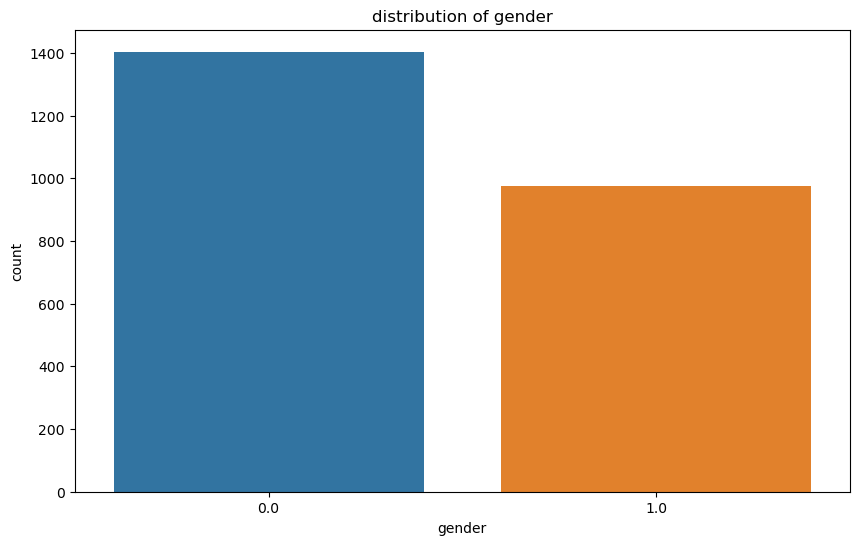

G:\software\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


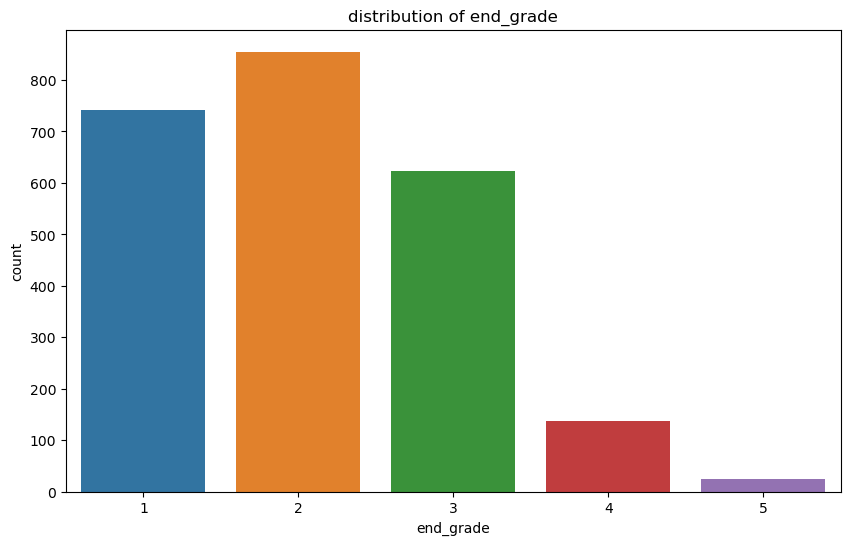

G:\software\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


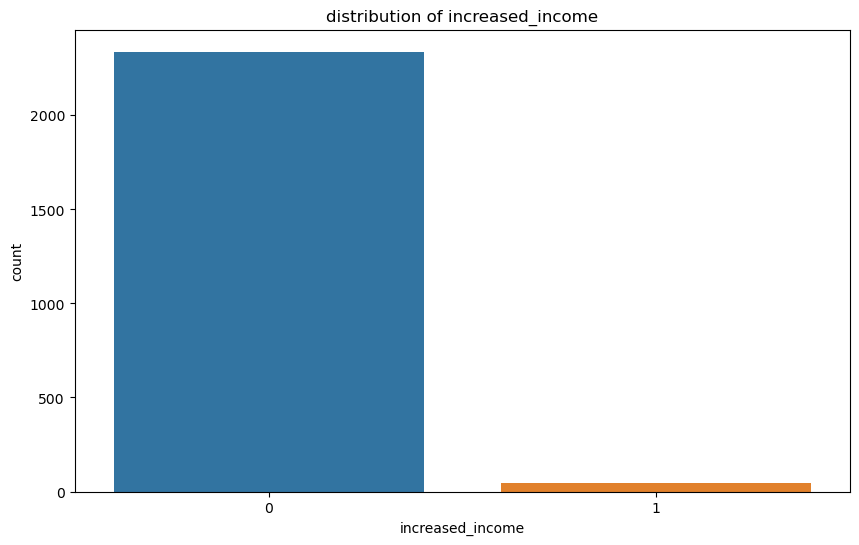

G:\software\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


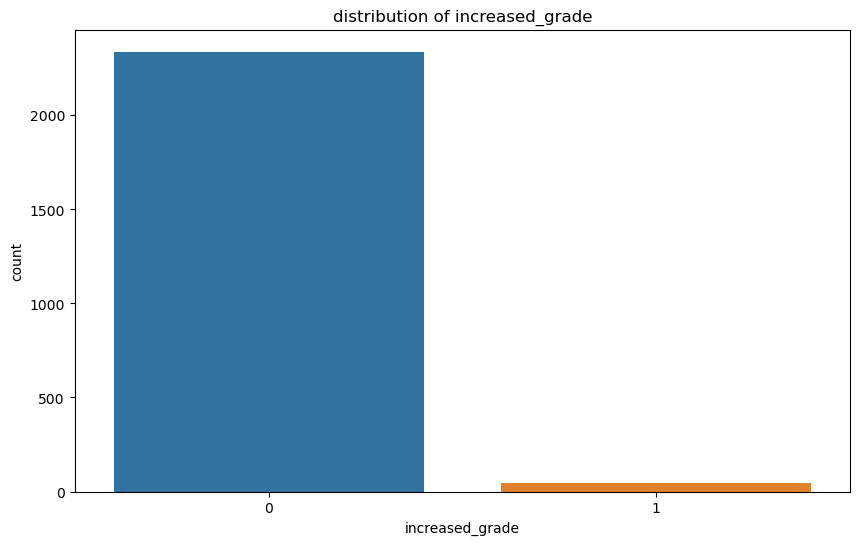

G:\software\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


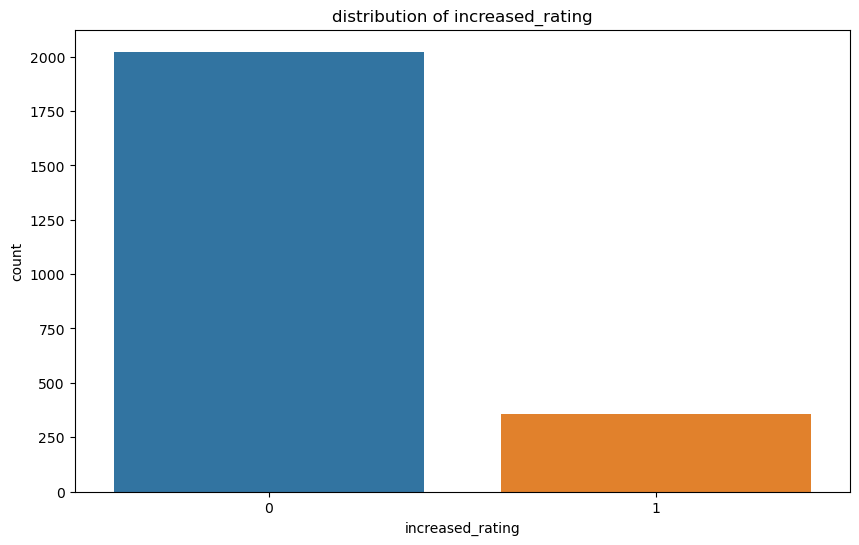

G:\software\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


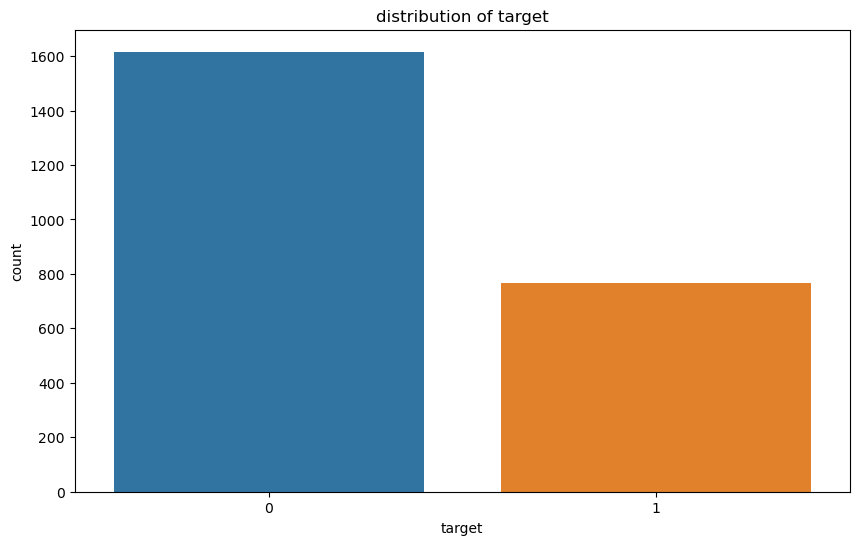

In [70]:

for i in cat_variables:
    fig, axes = plt.subplots(figsize=(10,6))
    plt.title(f'distribution of {i}')
    sns.countplot(df1[i])
    plt.show()

1.More males drivers are there than females

2.Highest grade obtained by leaving drivers overall is 2 followed by 1,3

3.We have more drivers which are with ola currently is more than people who left this organisation

G:\software\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


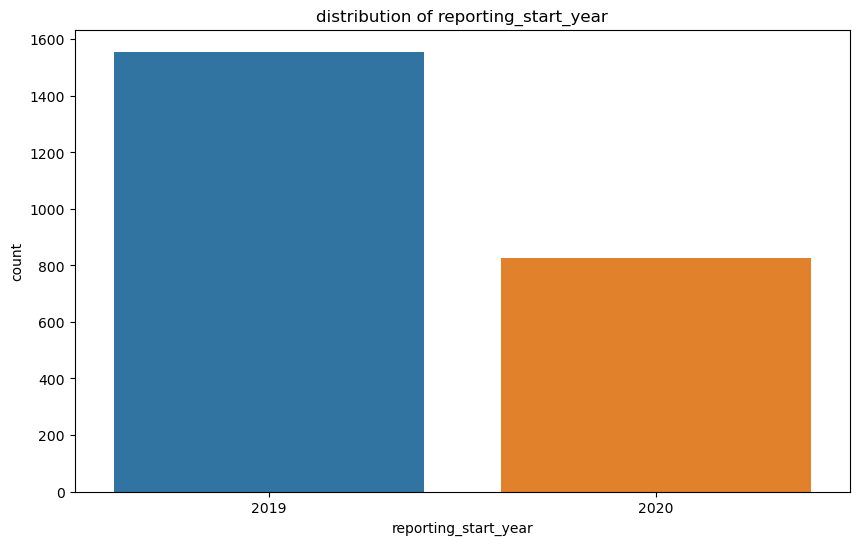

G:\software\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


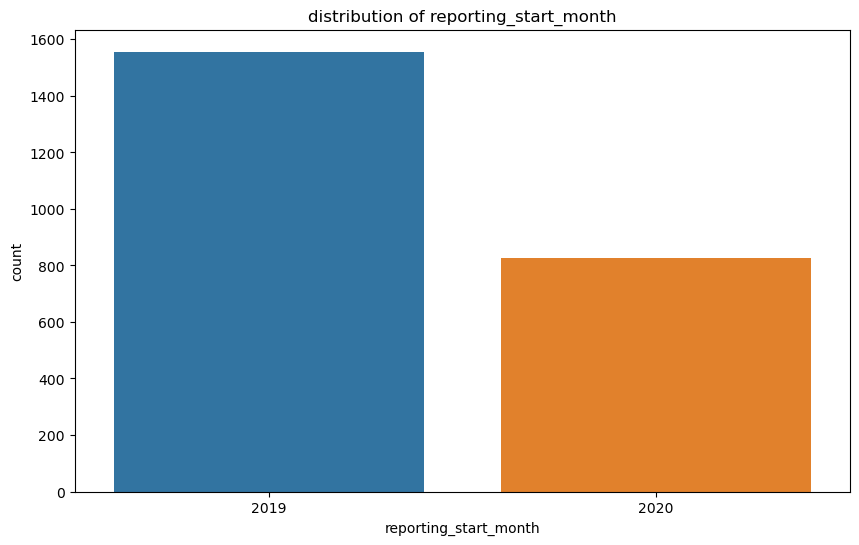

G:\software\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


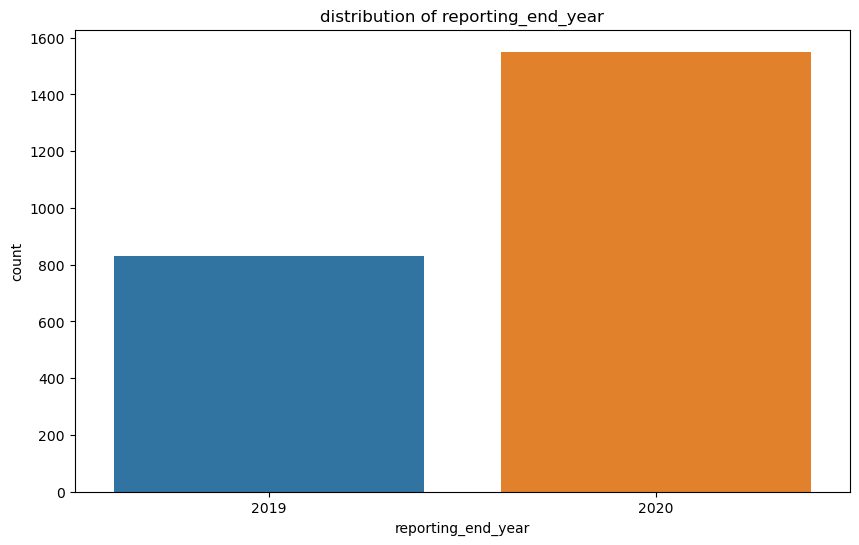

G:\software\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


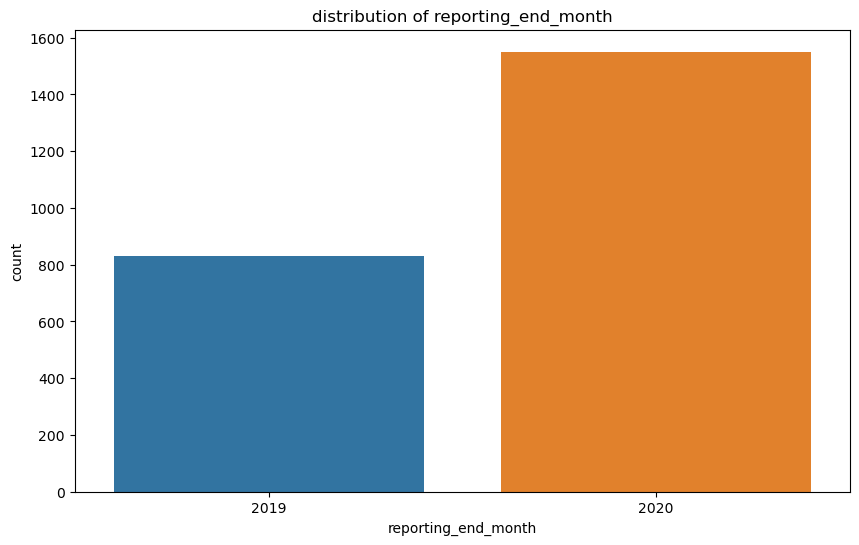

G:\software\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


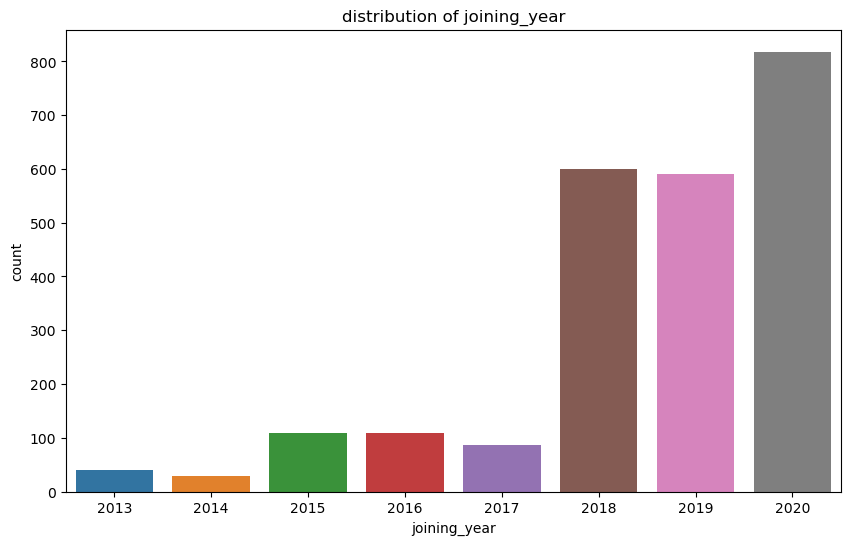

G:\software\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


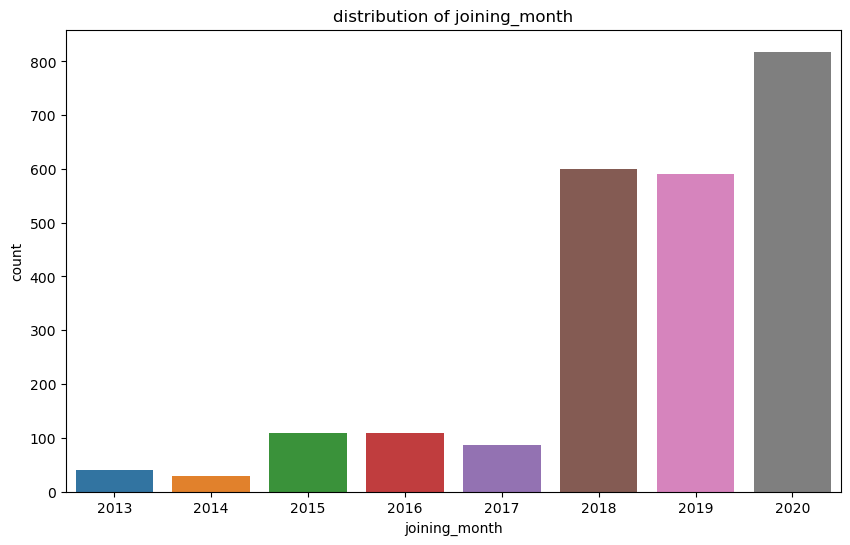

In [71]:
for i in ('reporting_start_year','reporting_start_month','reporting_end_year','reporting_end_month','joining_year','joining_month'):
    fig, axes = plt.subplots(figsize=(10,6))
    plt.title(f'distribution of {i}')
    sns.countplot(df1[i])
    plt.show()

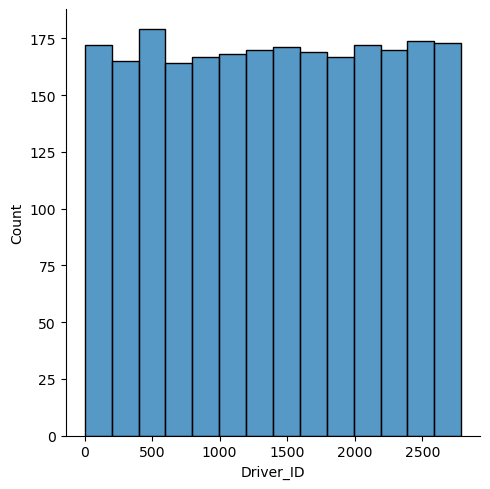

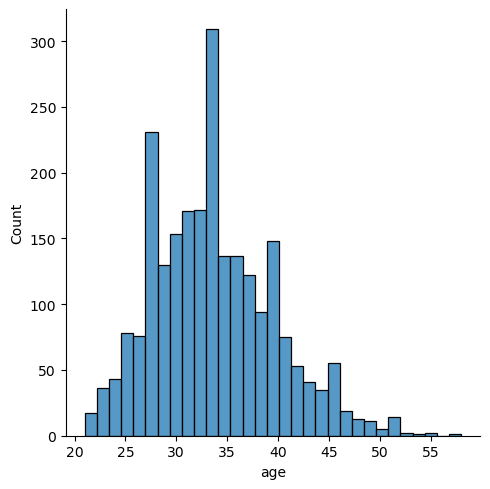

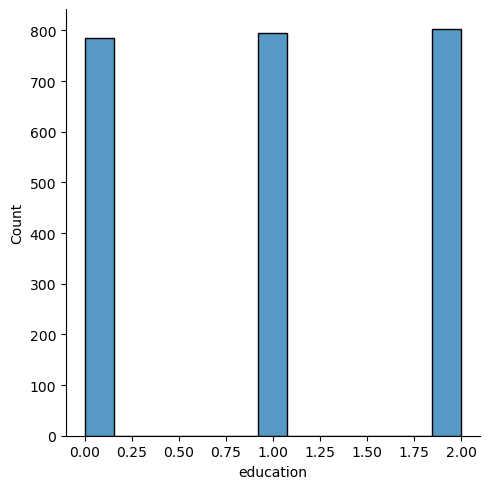

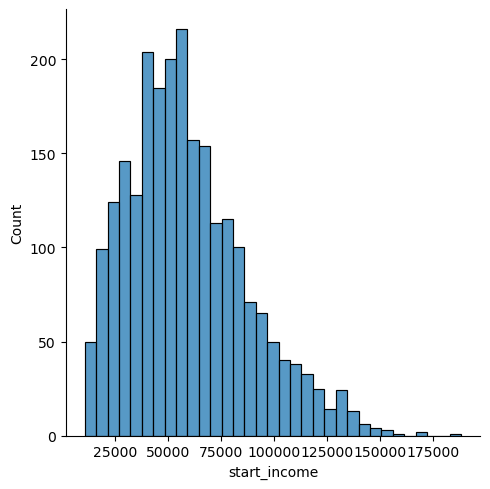

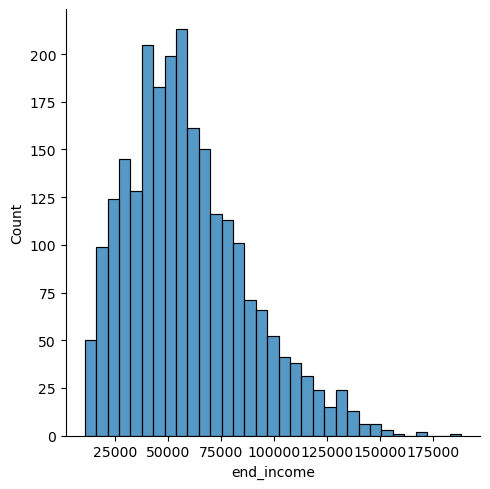

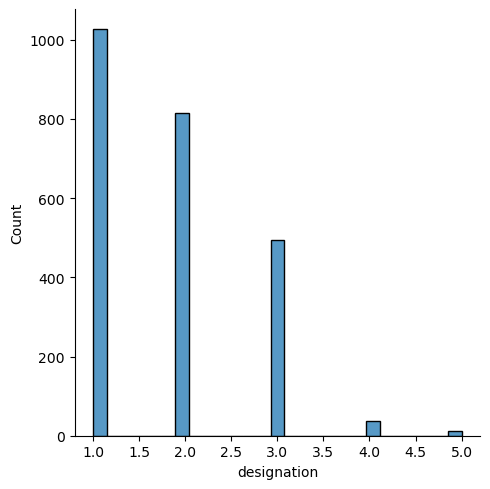

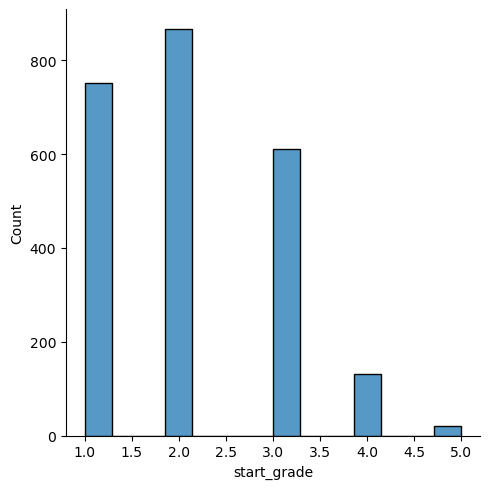

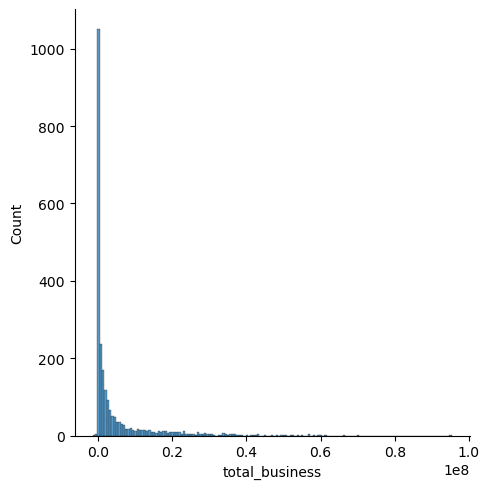

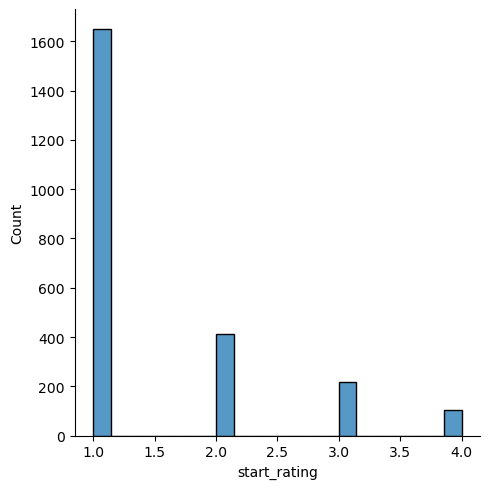

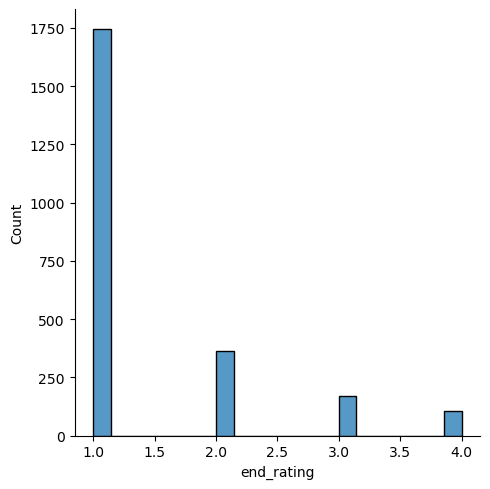

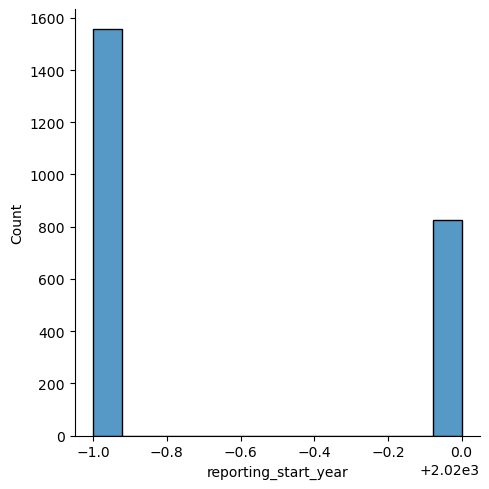

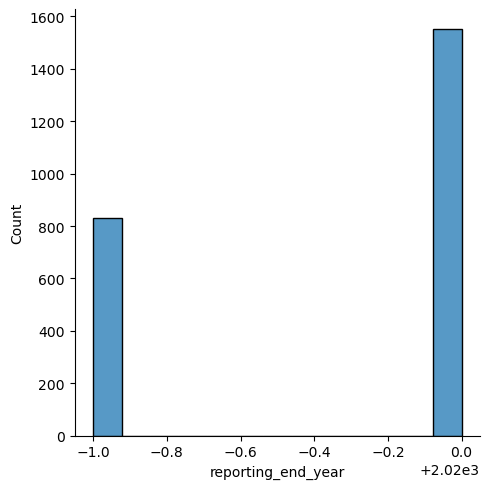

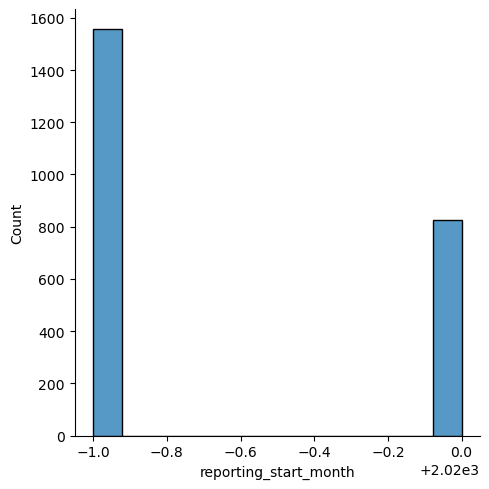

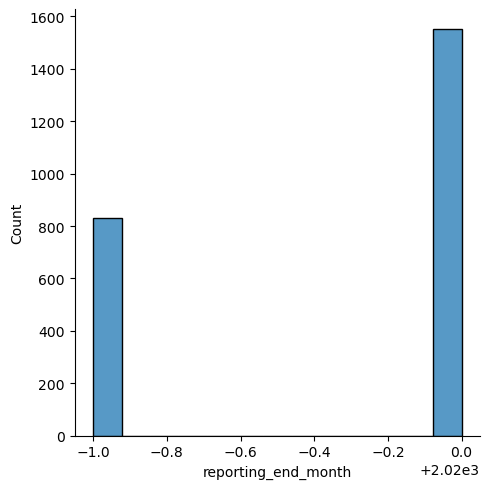

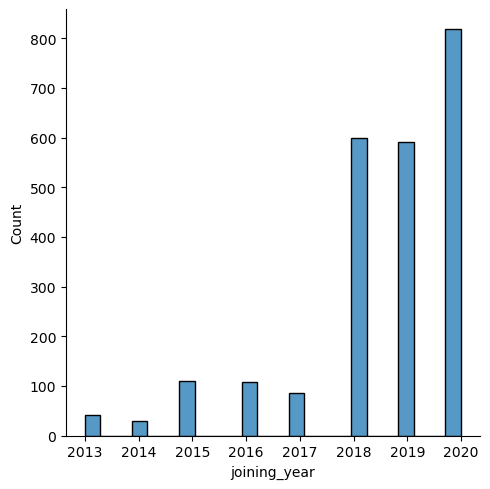

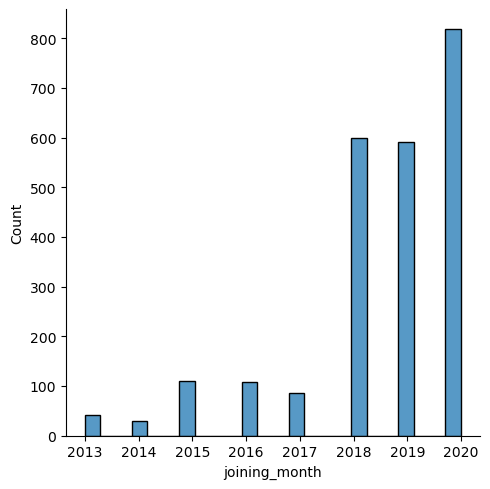

In [72]:
#Selecting numerical variables
num_variables=df1.select_dtypes(include=['int','float'])
#print(num_variables[0])

#Distribution of numerical columns
for i in num_variables:
    #fig,axes=plt.subplots(figsize=(10,6))
    sns.displot(df1[i])
    plt.show()

1.Average age of drivers is between 31-34

2.Most of the graduates are being the drivers

3.start/end income is skewed with average start income between 50000 to 60000

4.Joining designation highest is 1

5.Highest obtained Starting grade was 2

6.Total business is right skewed

7.Highest Rating obtained was 1

8.Highest joining happened in 2020 followed by 2019

9.More drivers started joining after 2015.


### Bivariate Analysis

C:\Users\aps\AppData\Local\Temp\ipykernel_1032\4288679018.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,axis=plt.subplots(sharex=True,figsize=(10,6))


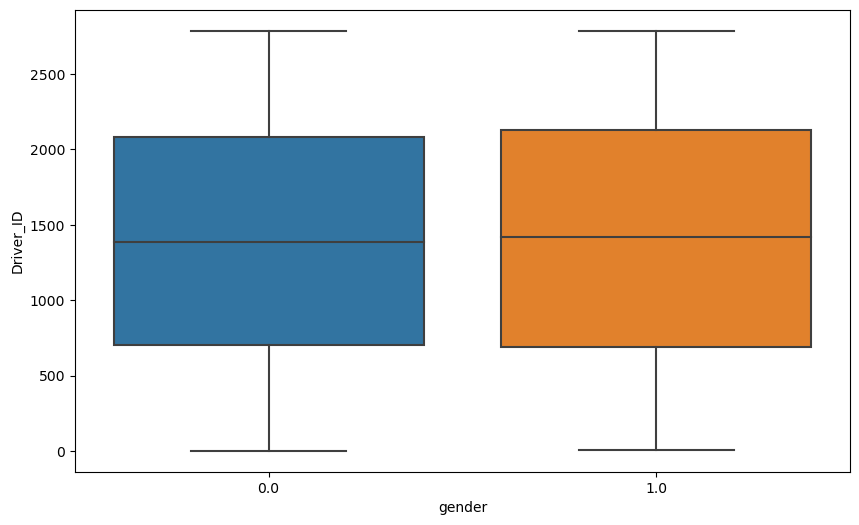

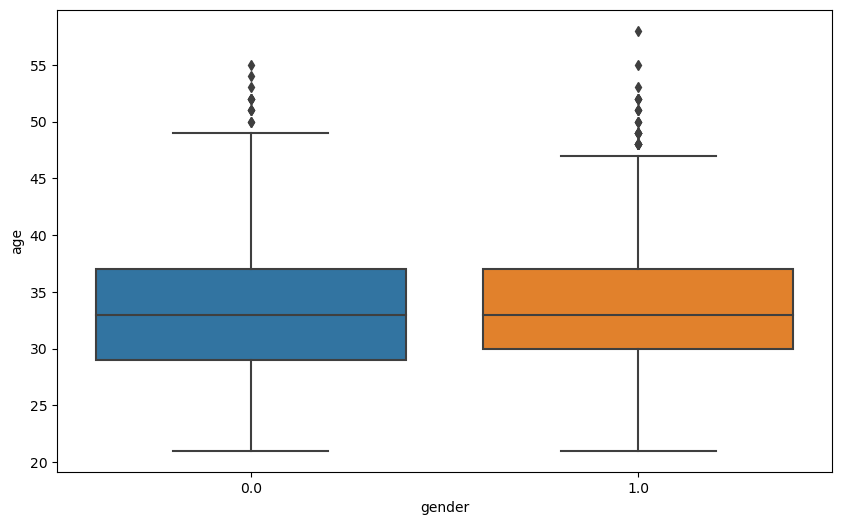

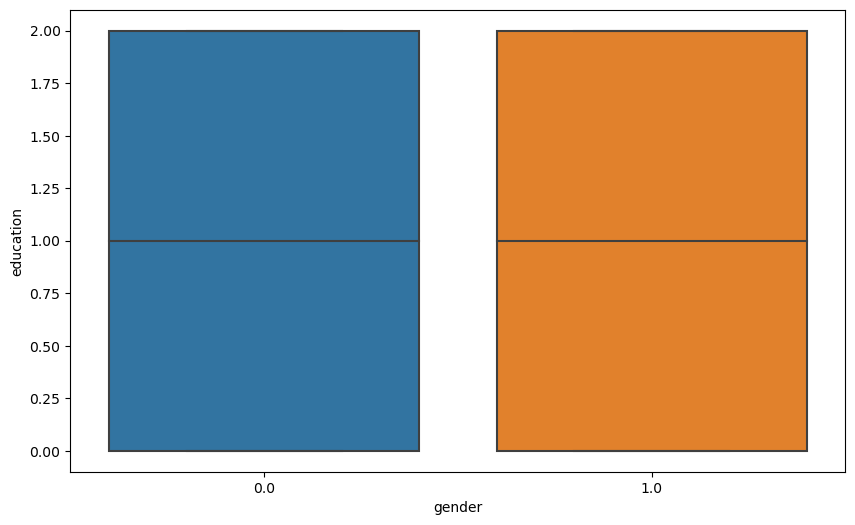

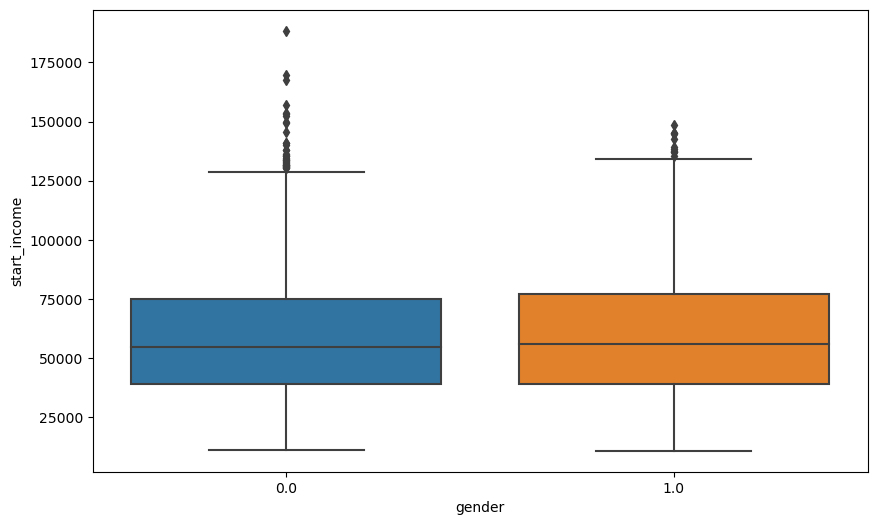

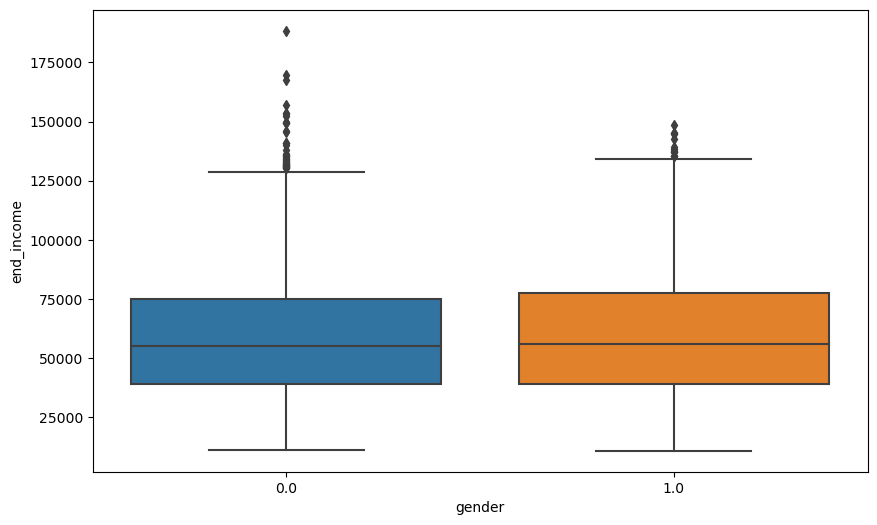

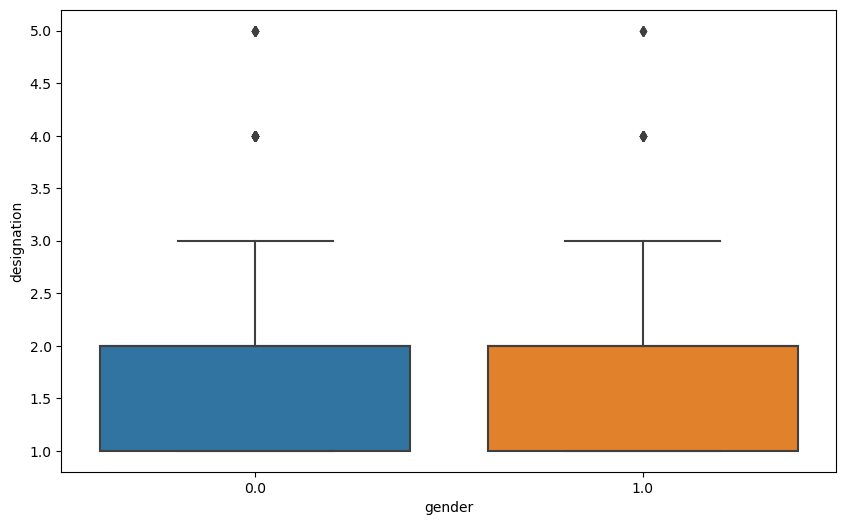

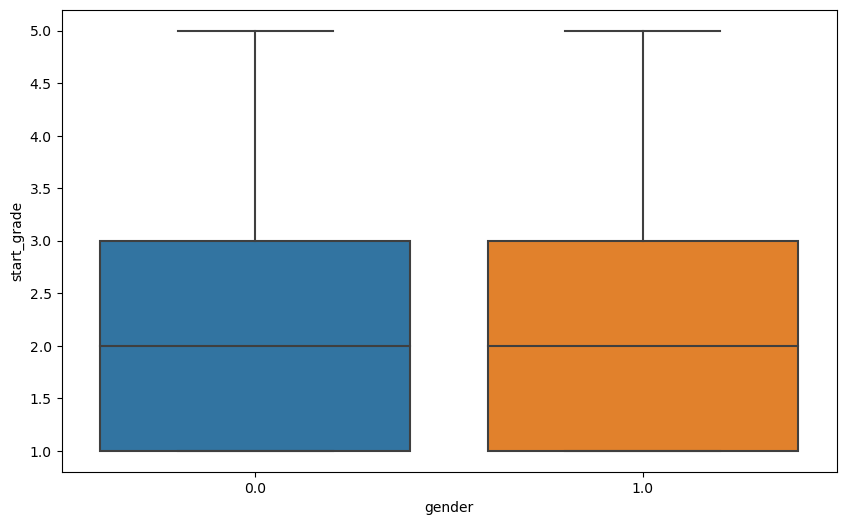

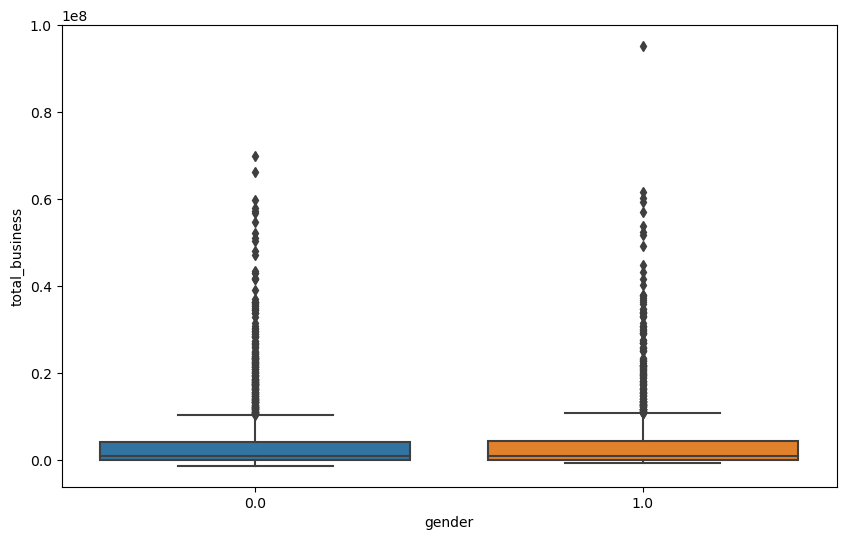

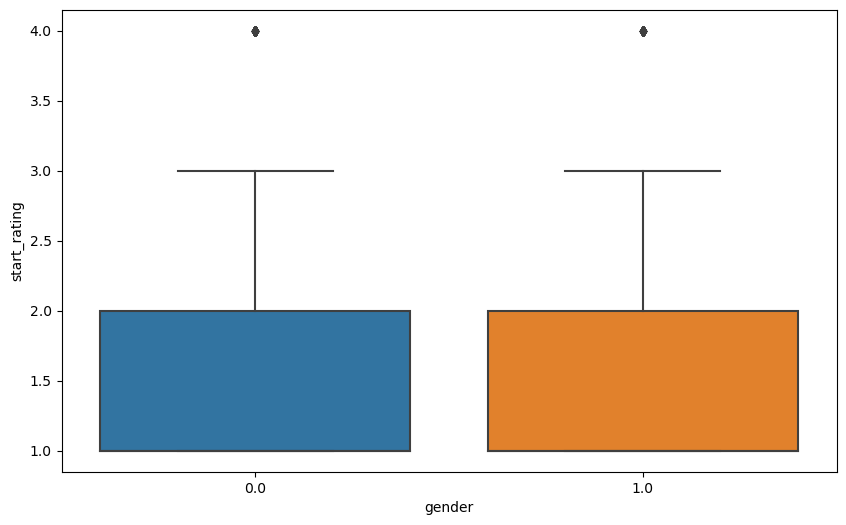

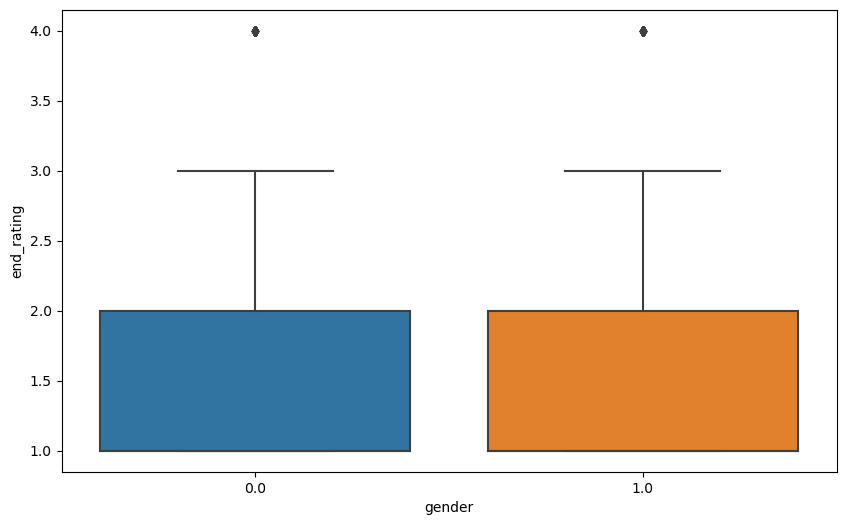

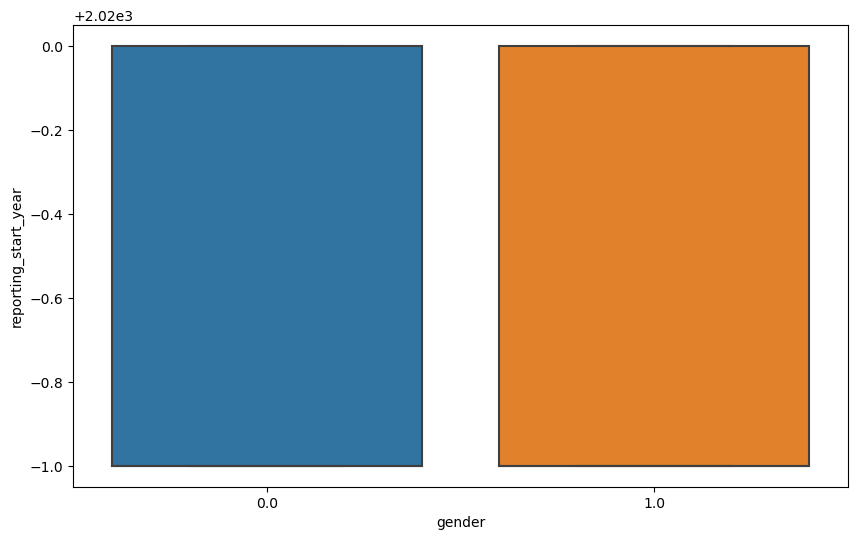

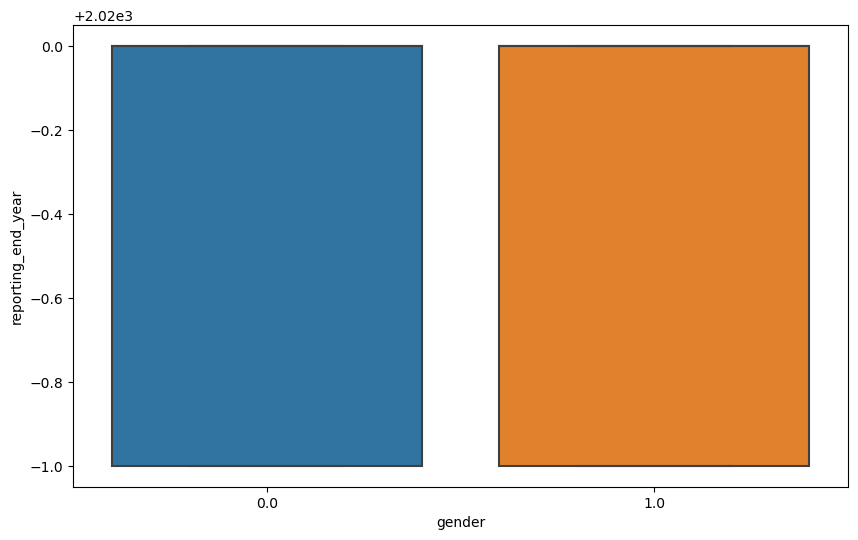

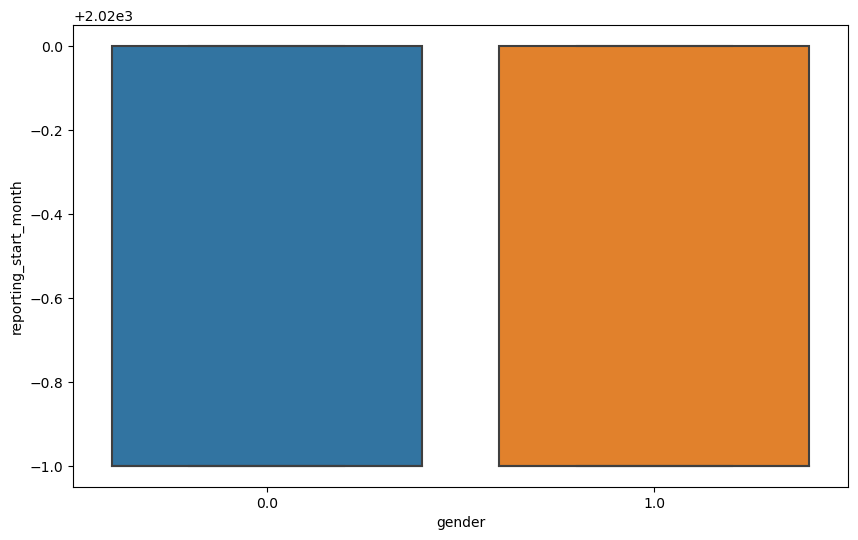

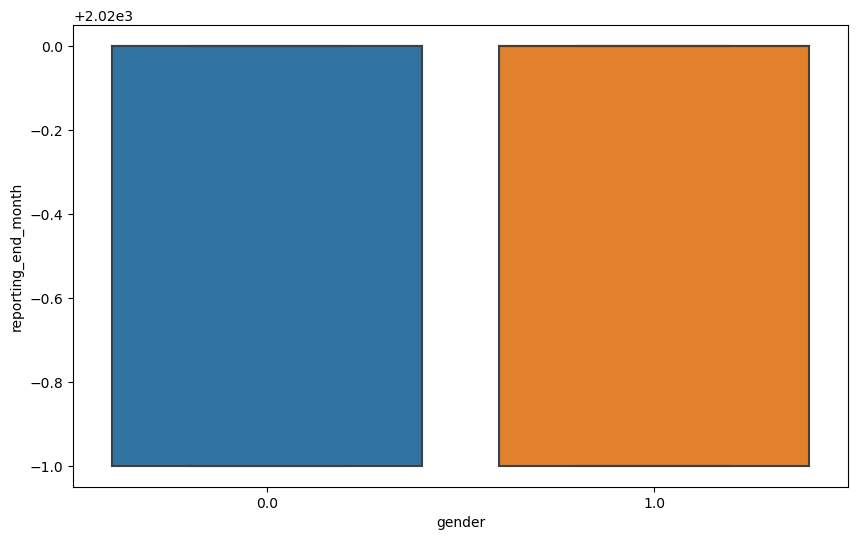

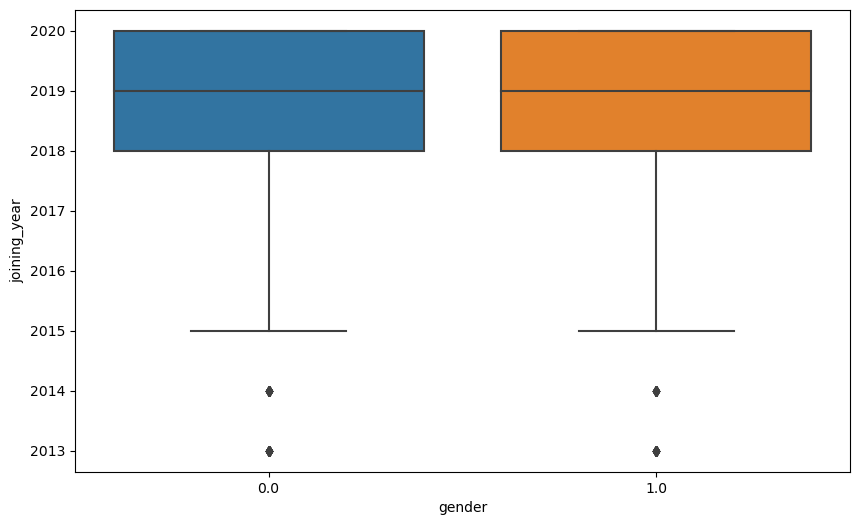

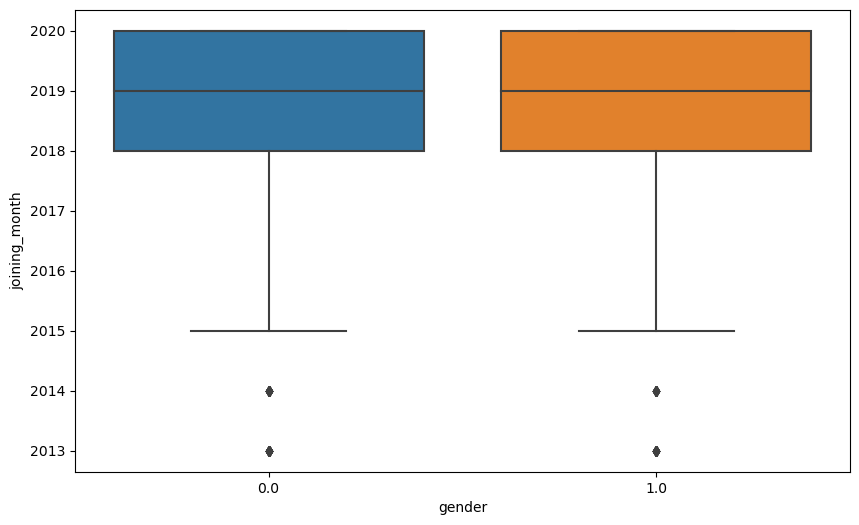

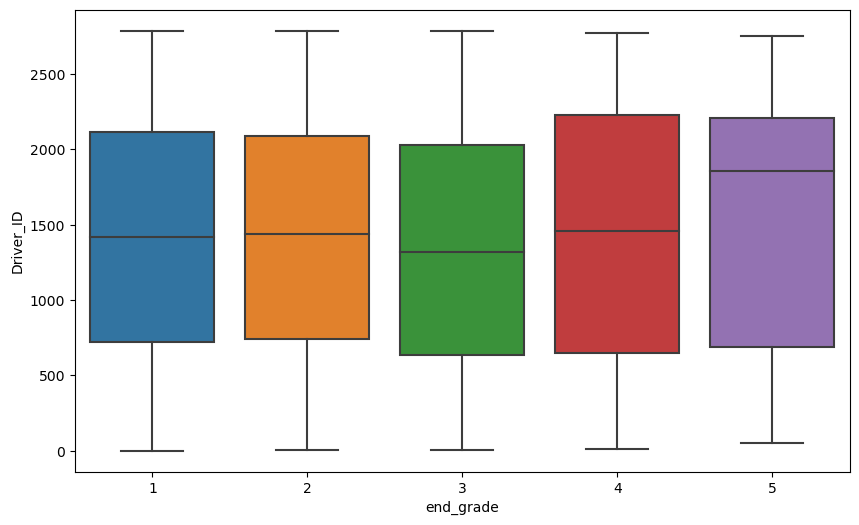

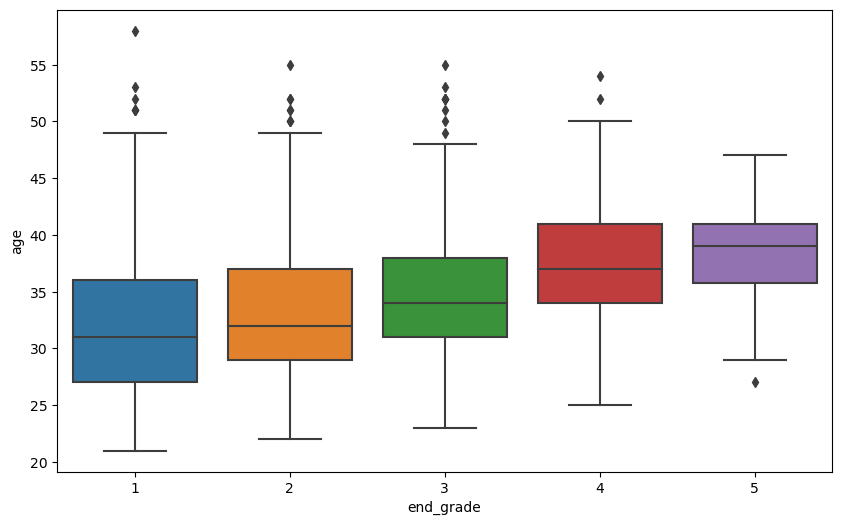

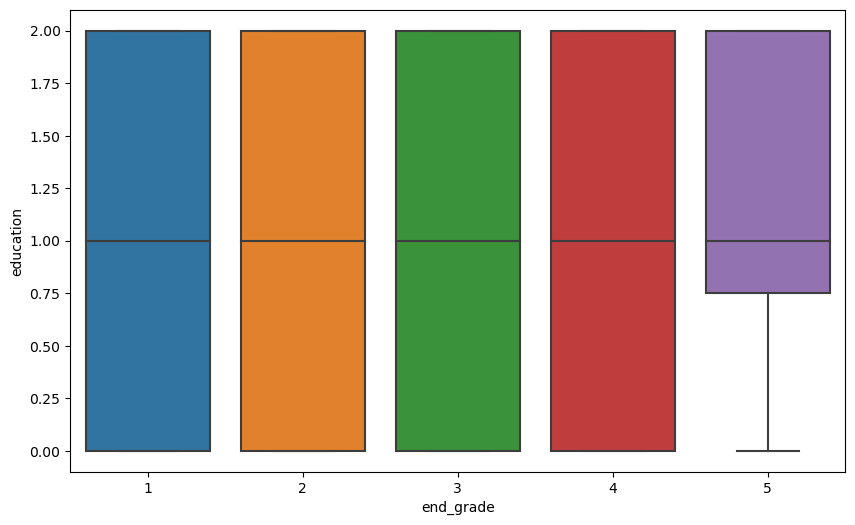

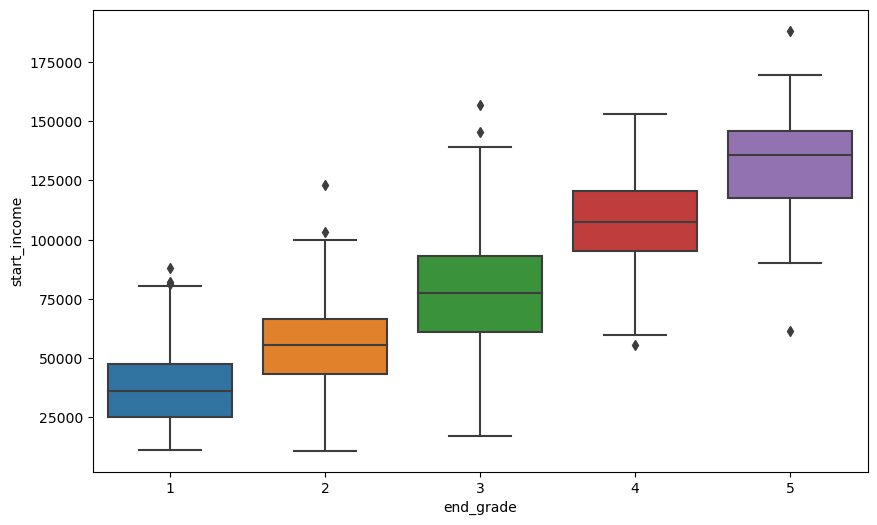

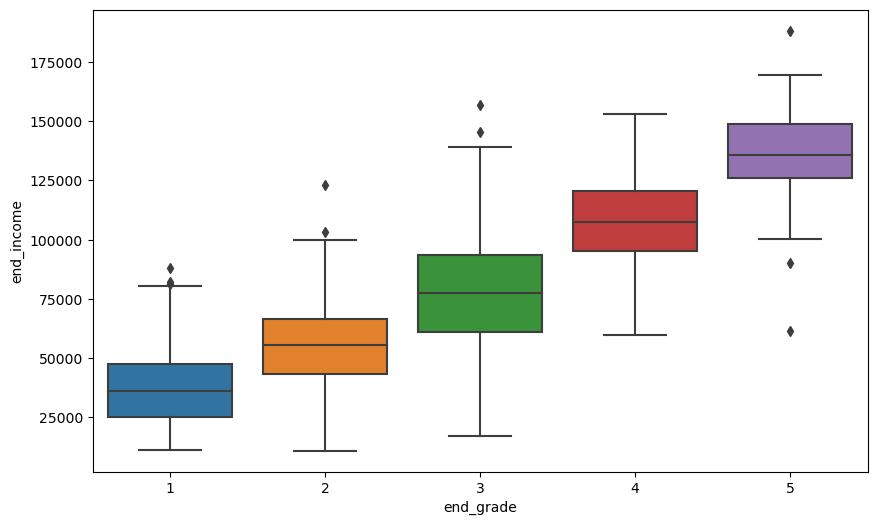

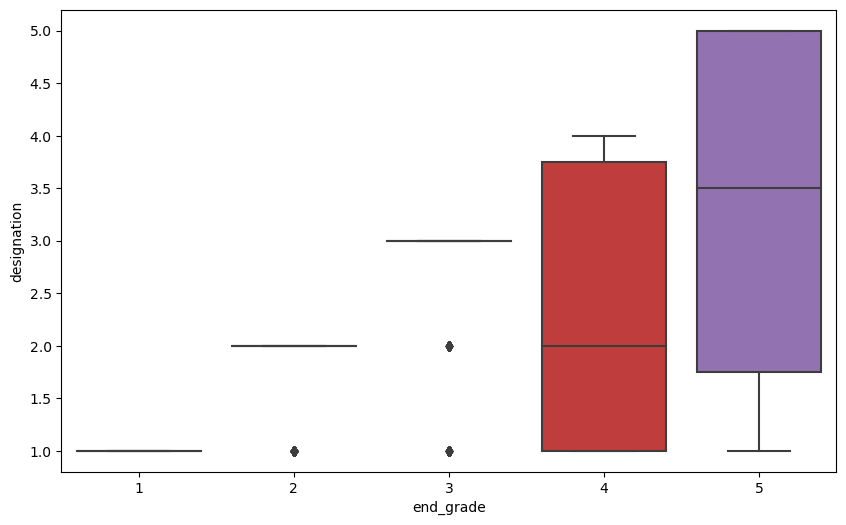

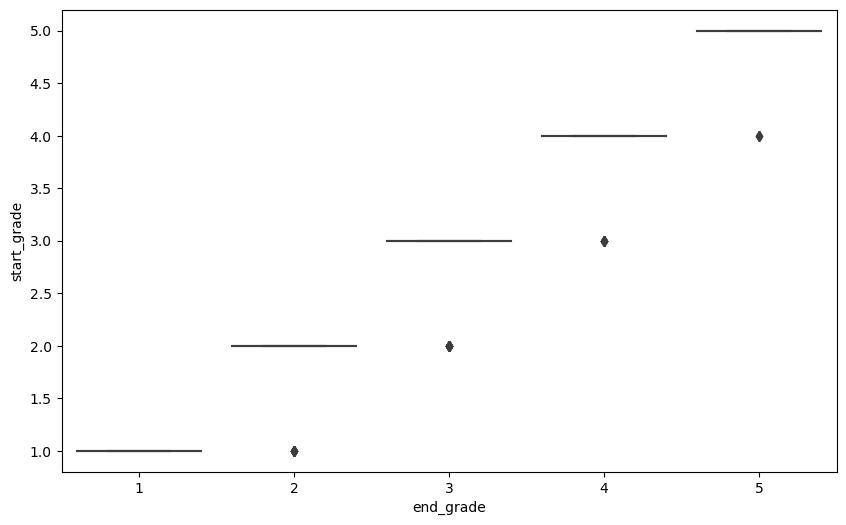

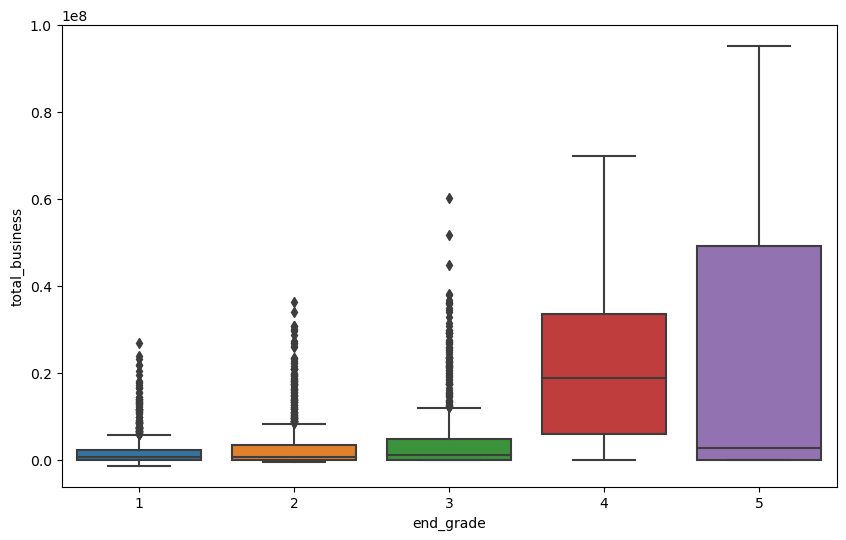

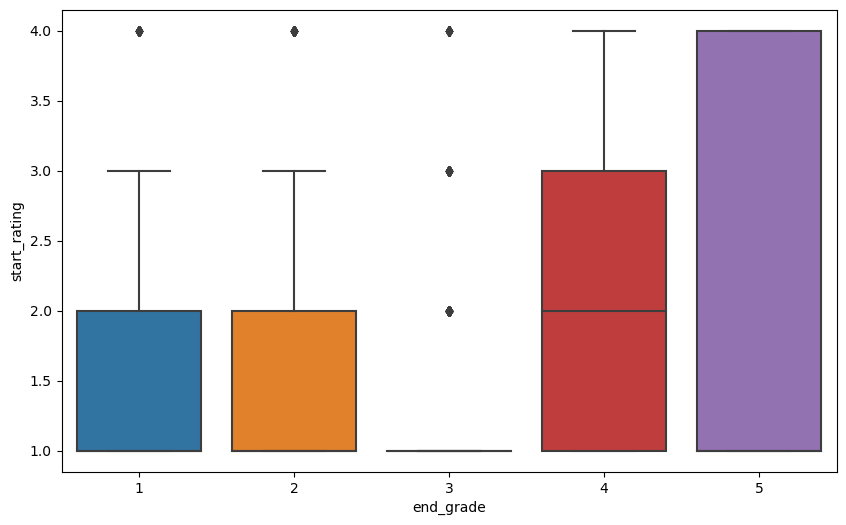

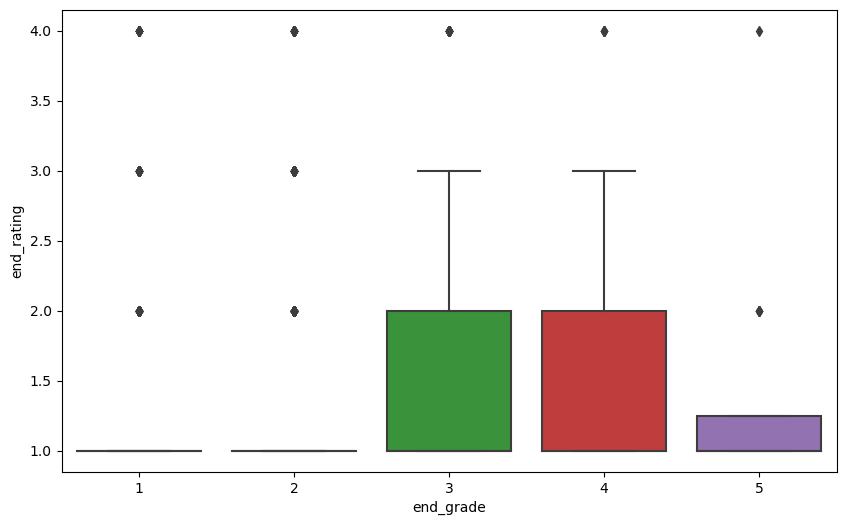

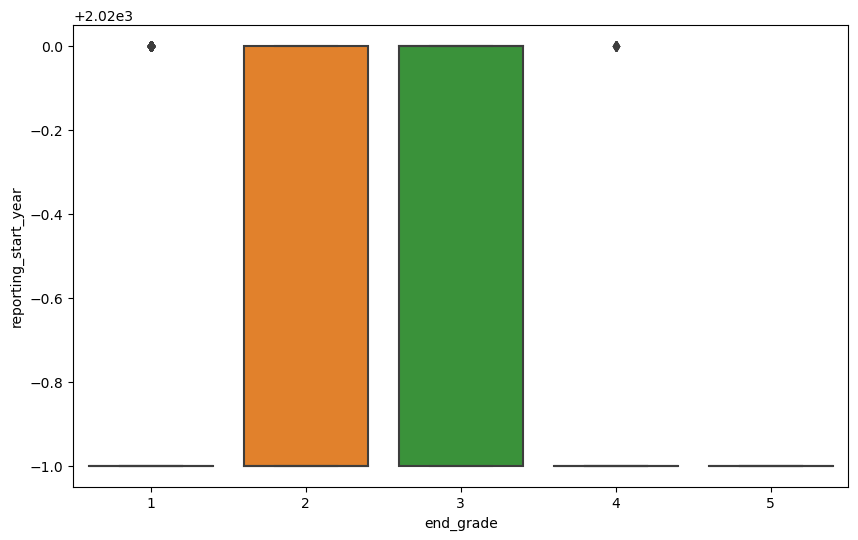

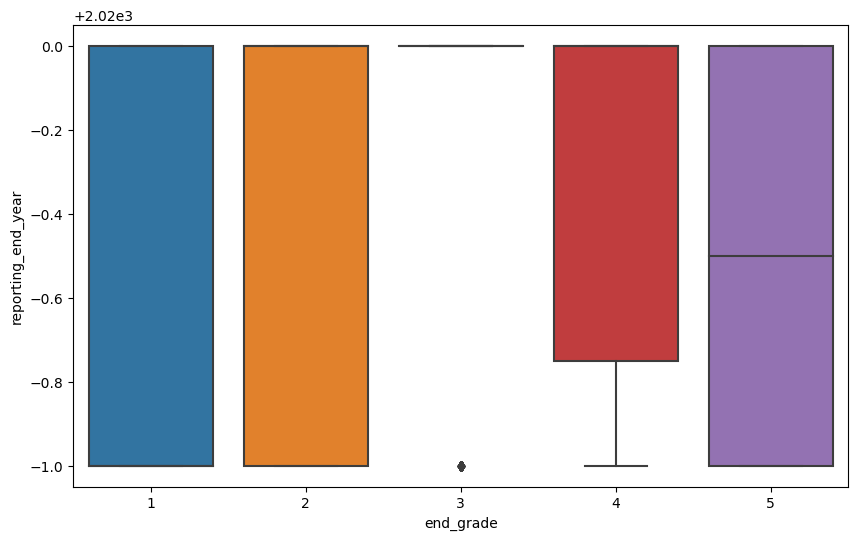

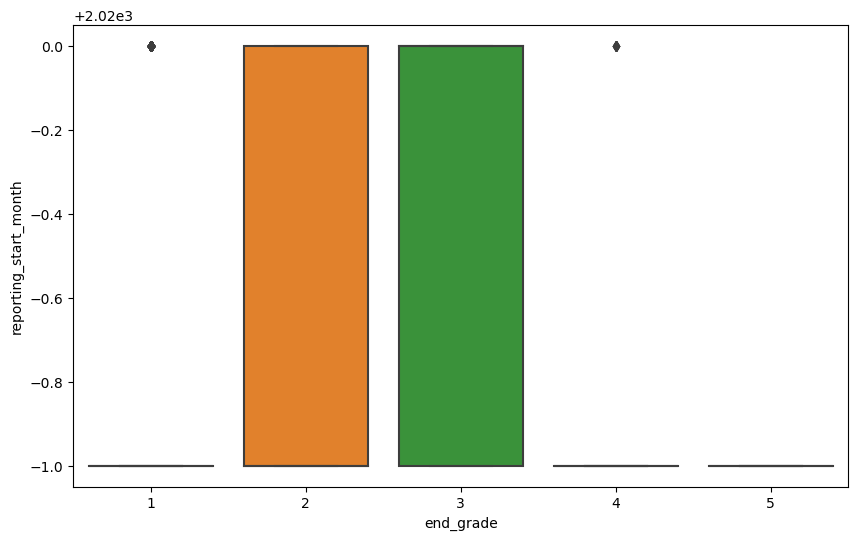

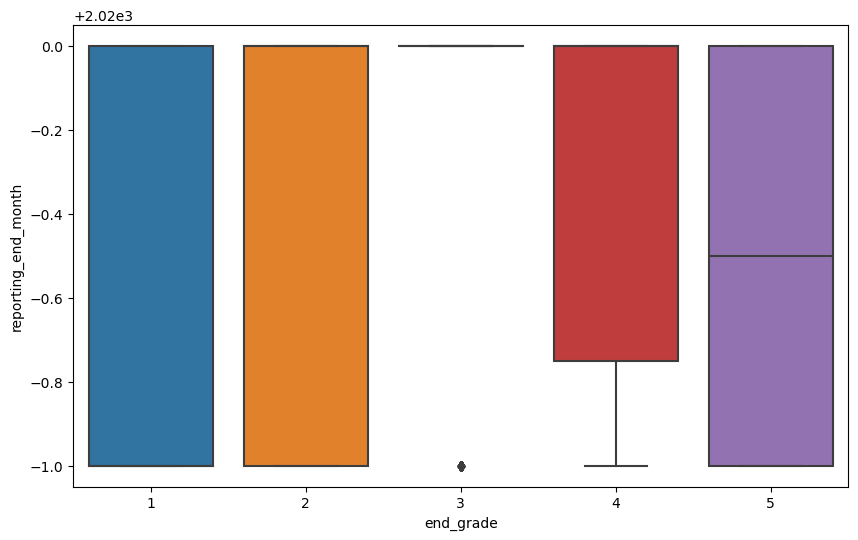

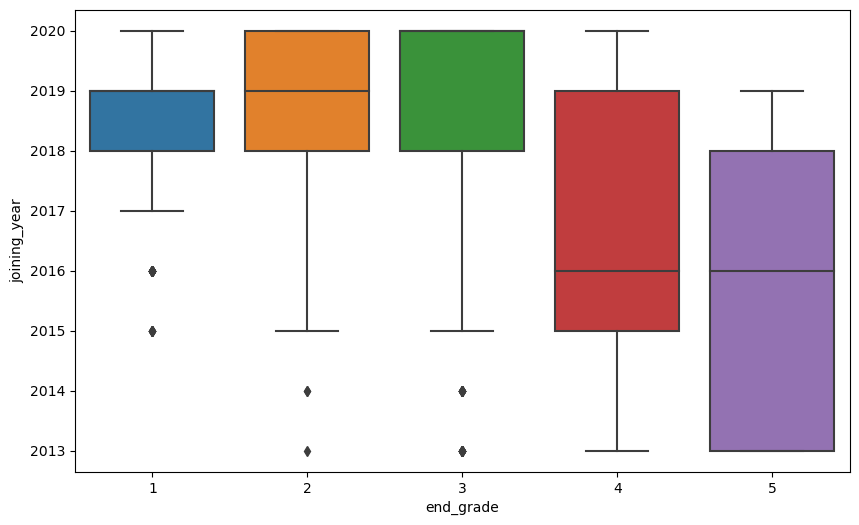

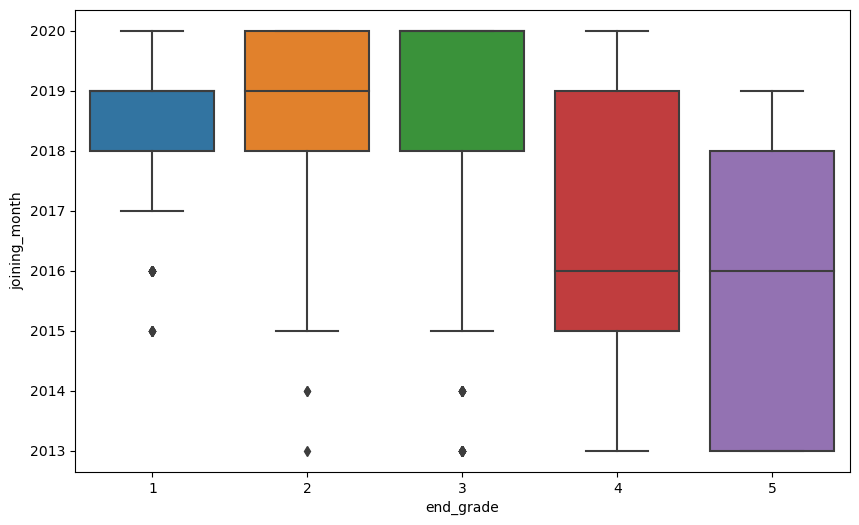

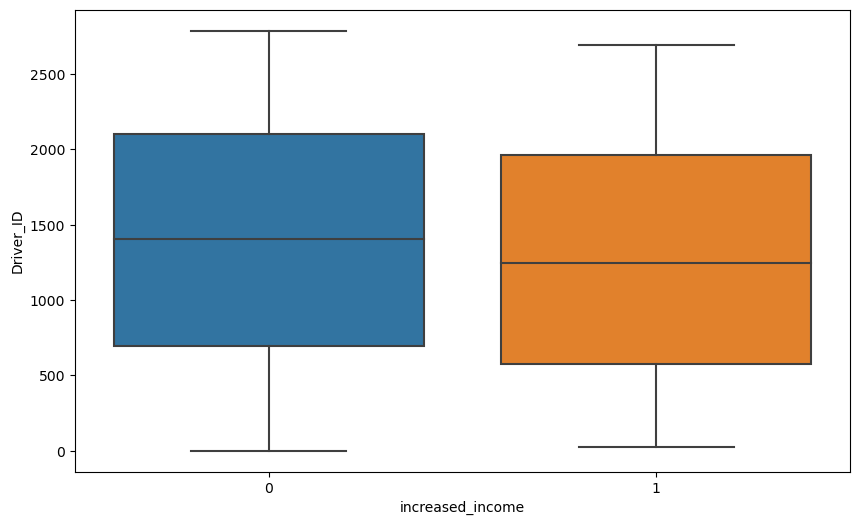

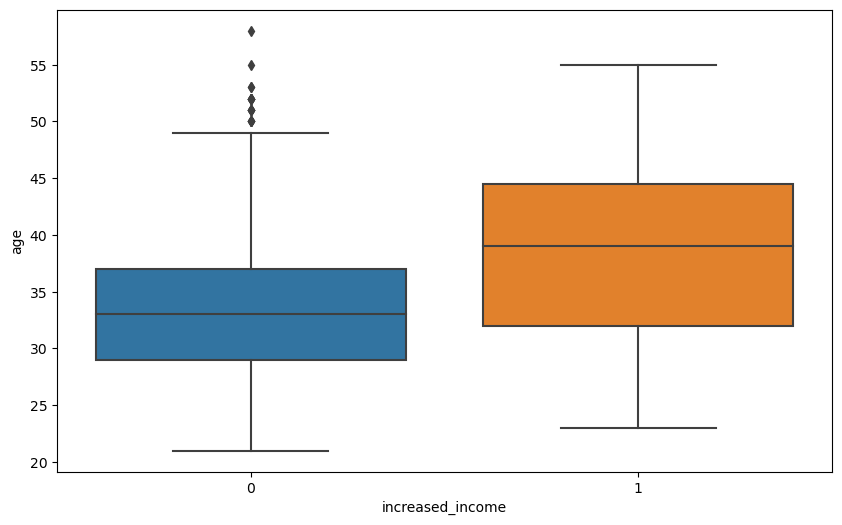

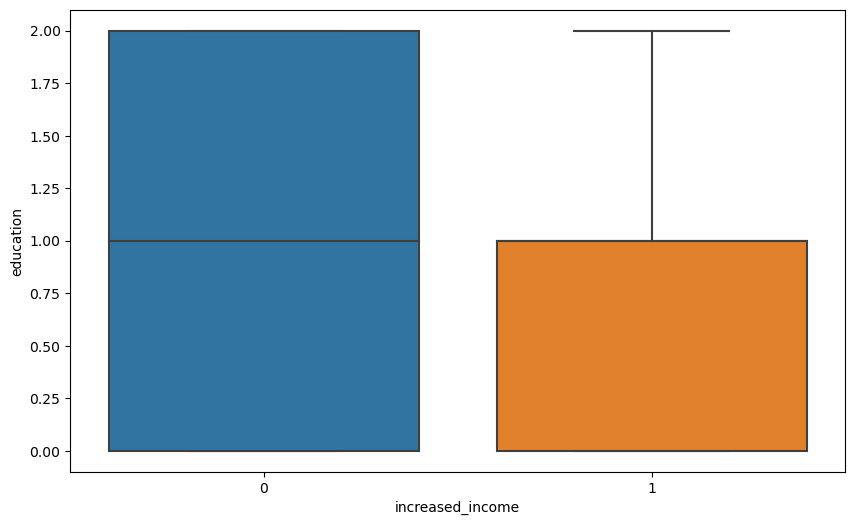

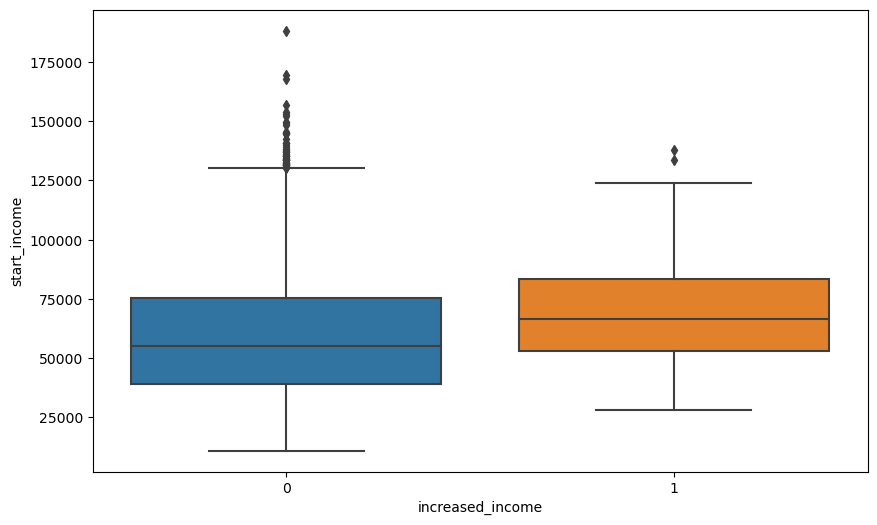

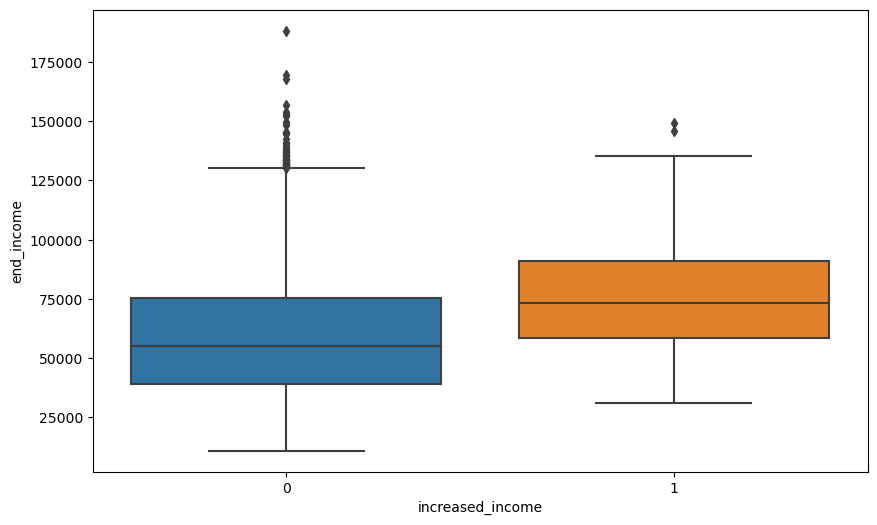

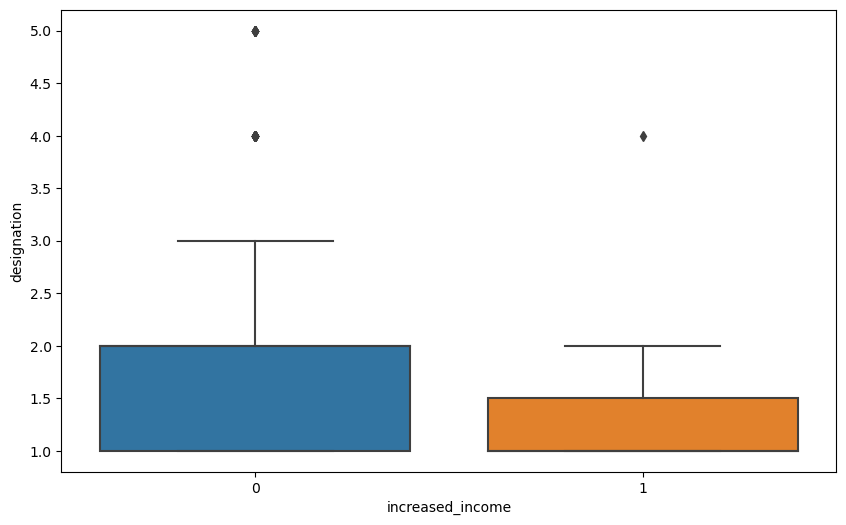

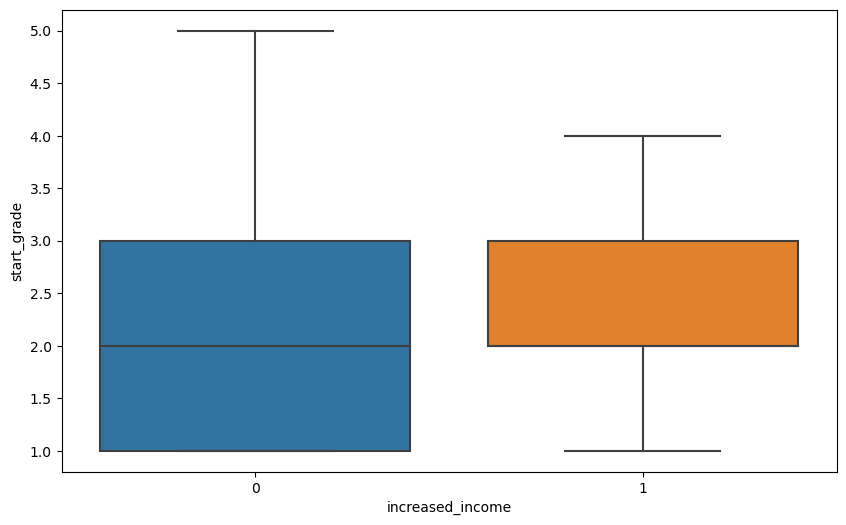

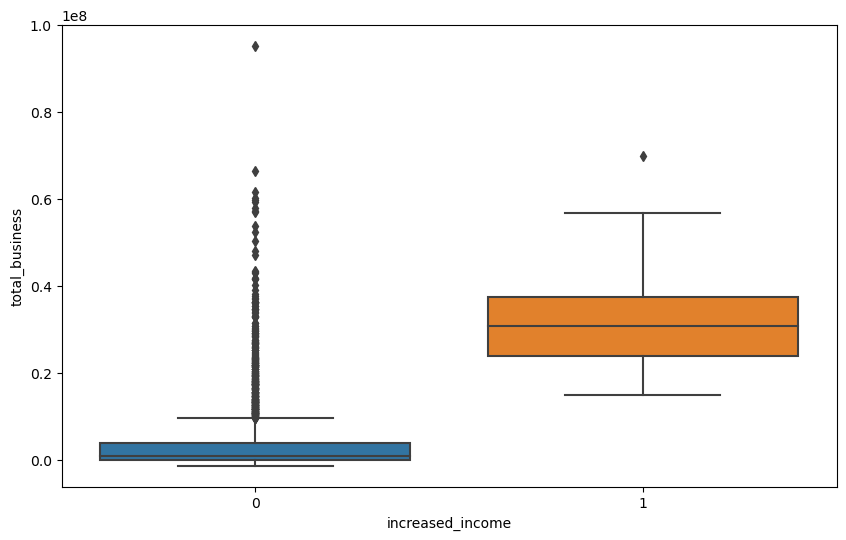

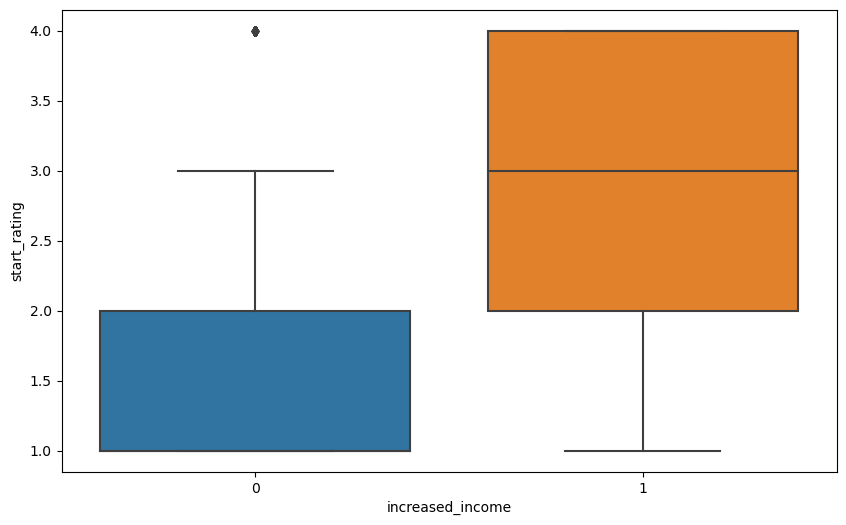

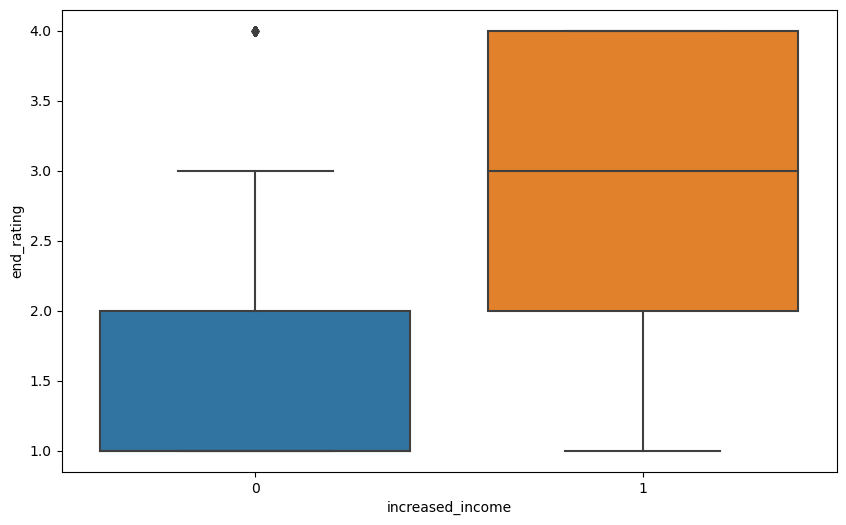

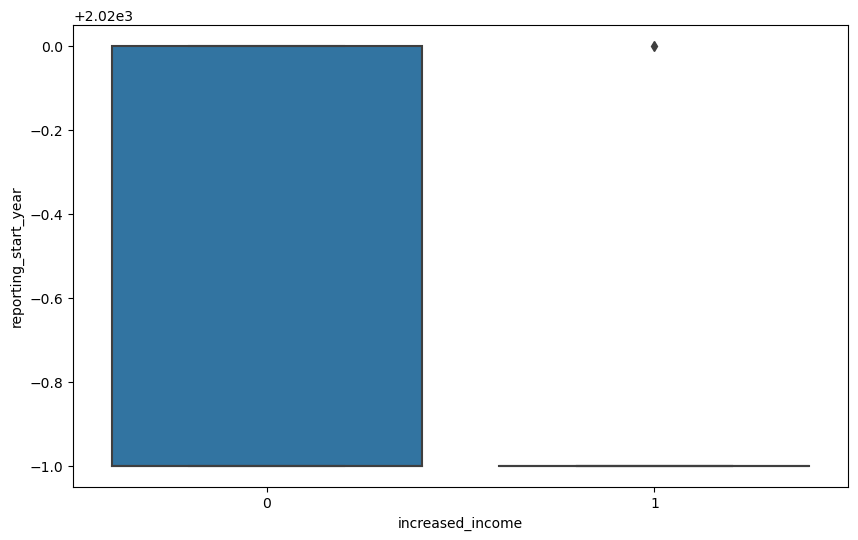

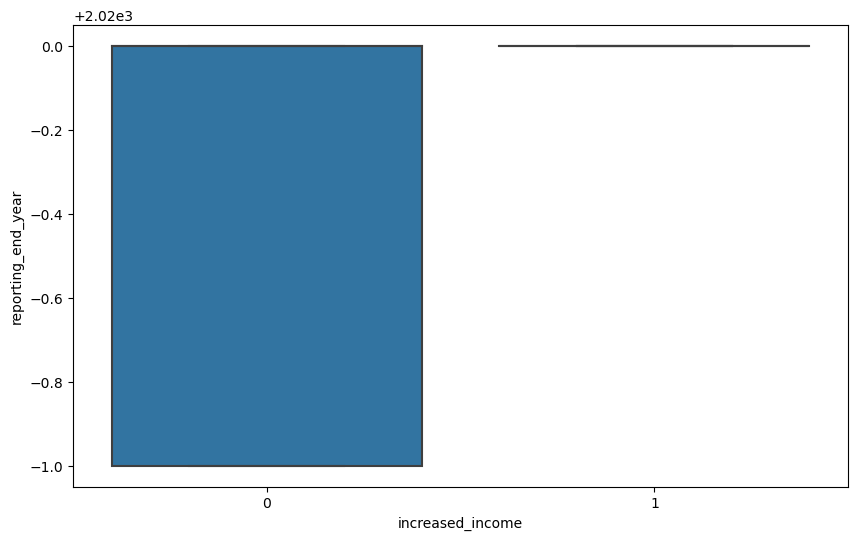

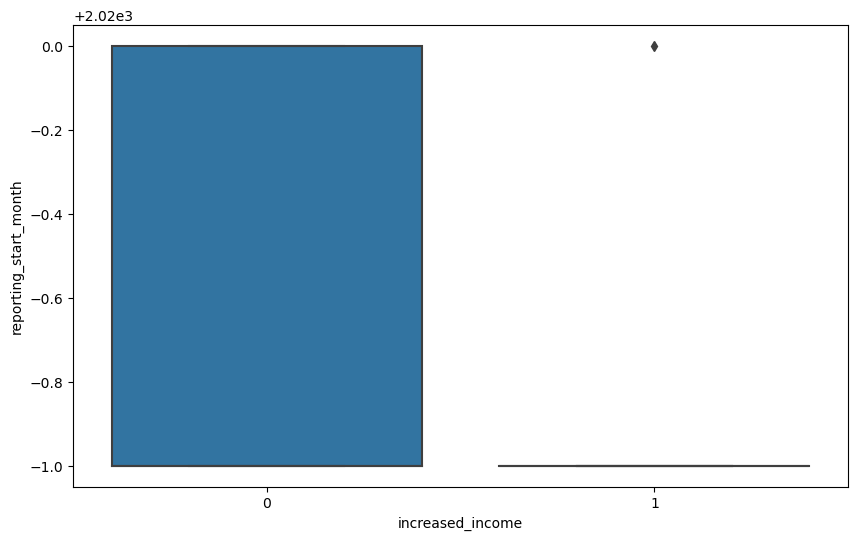

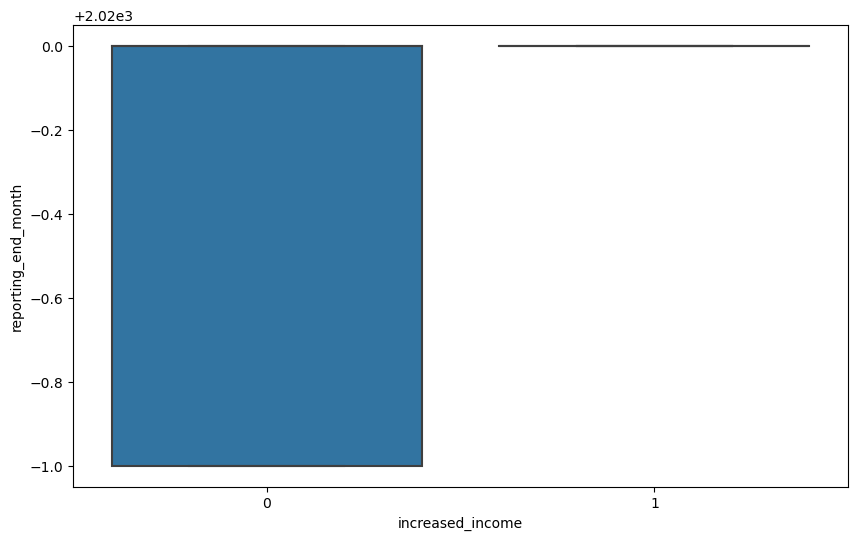

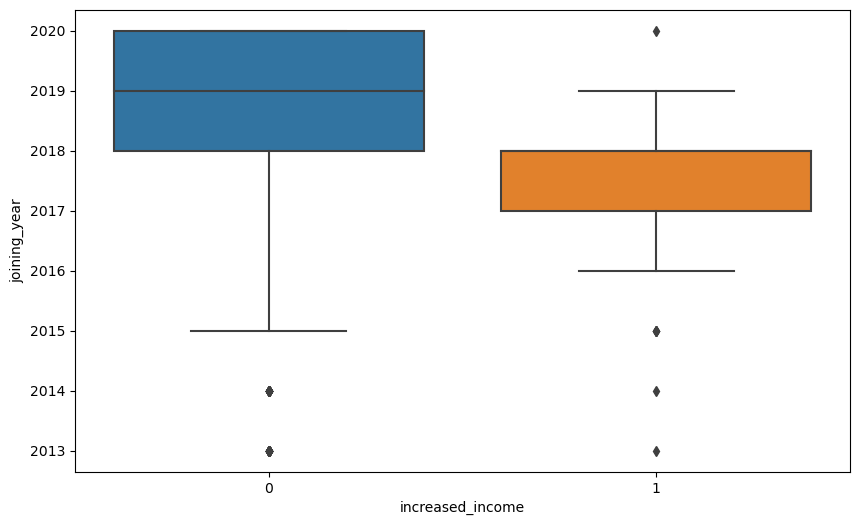

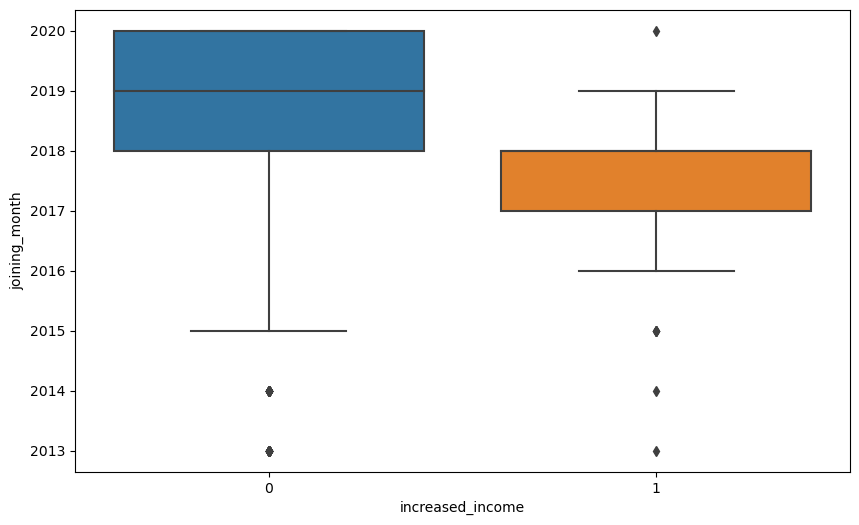

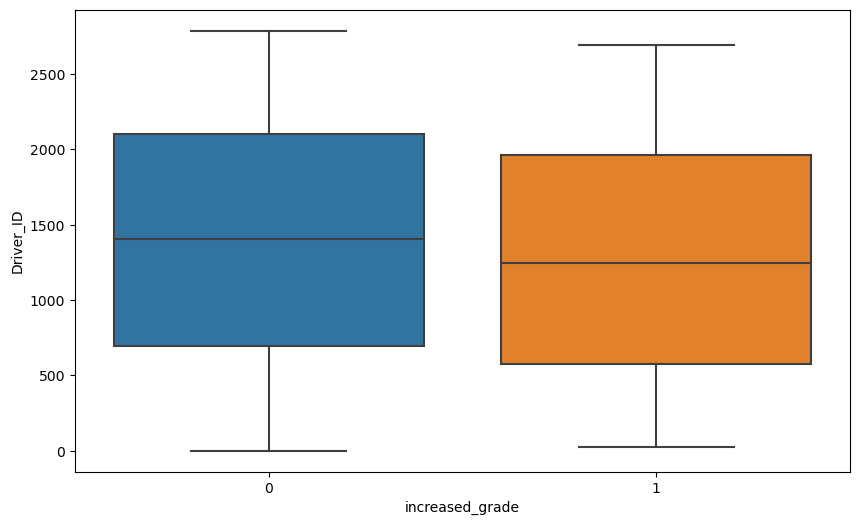

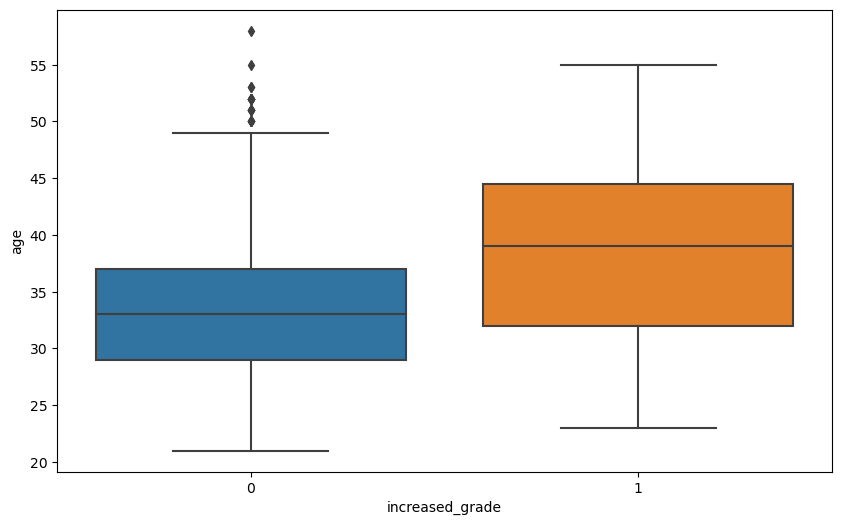

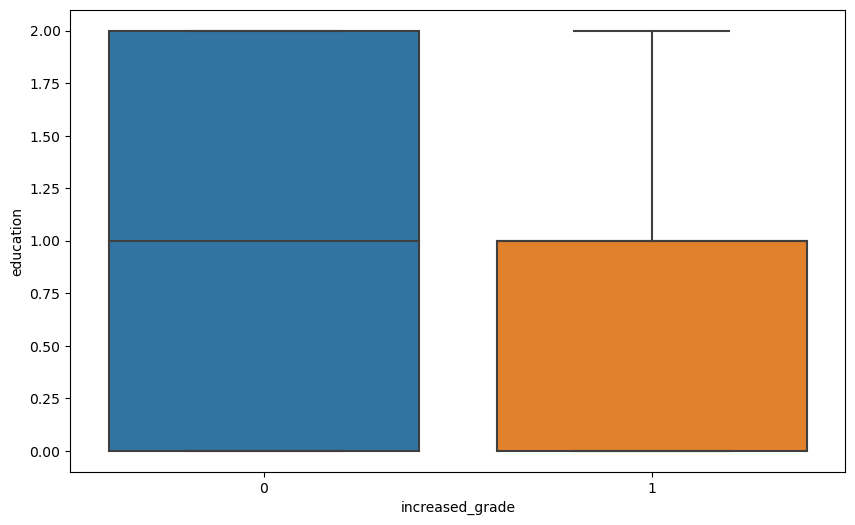

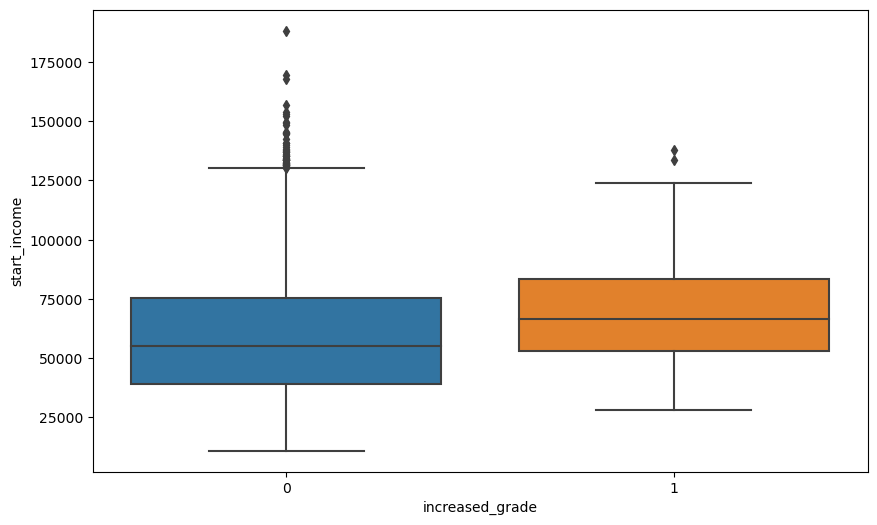

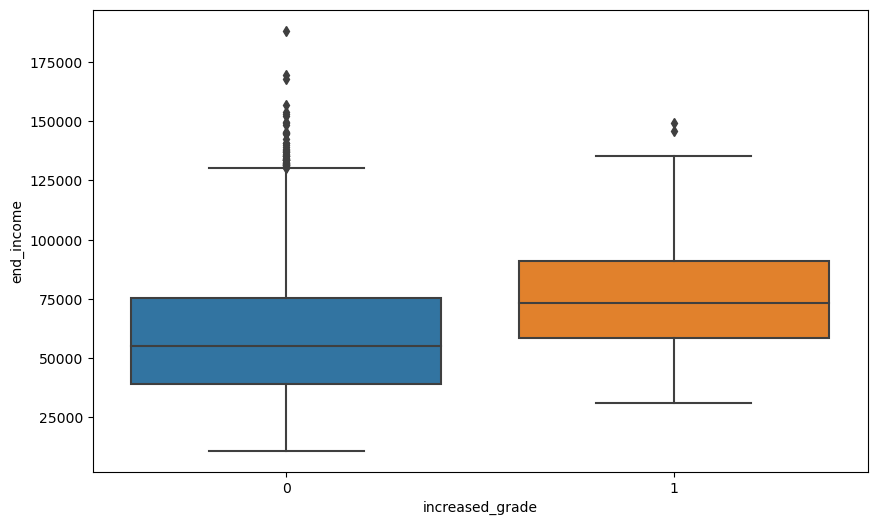

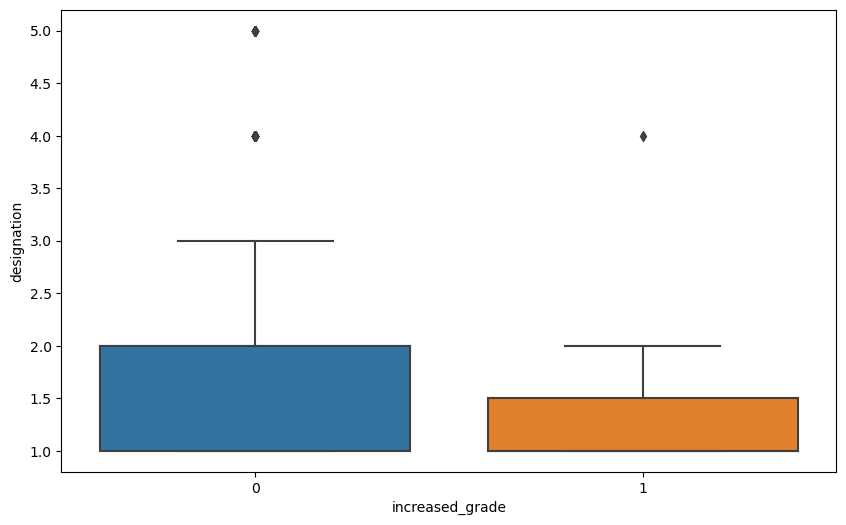

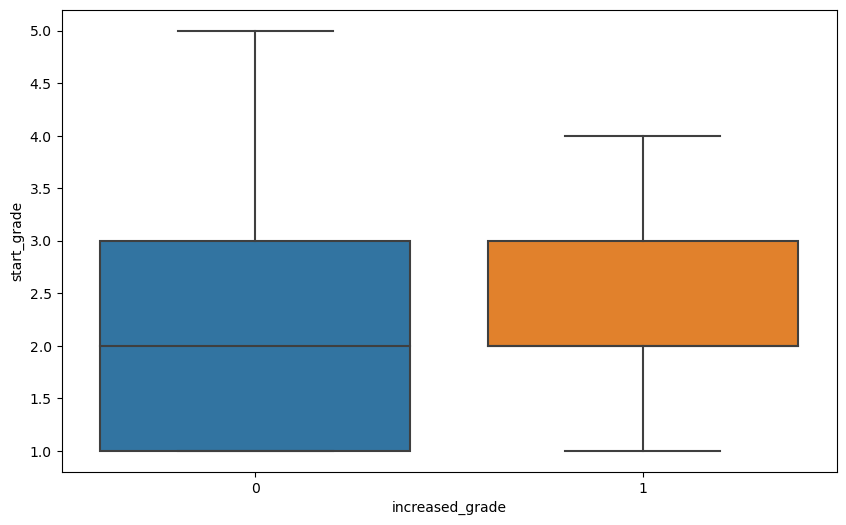

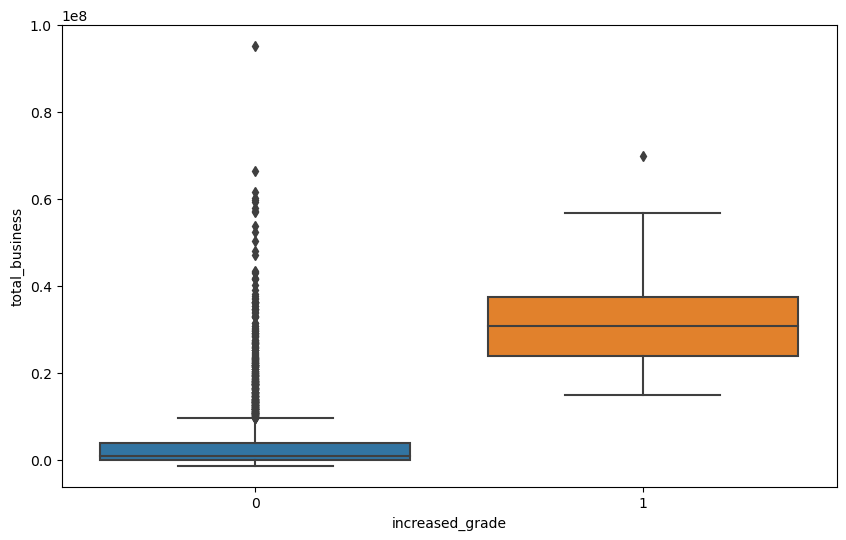

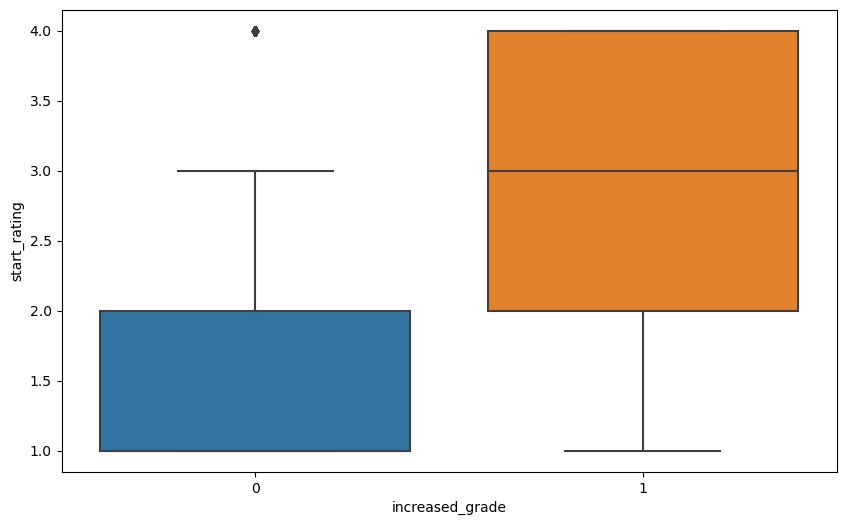

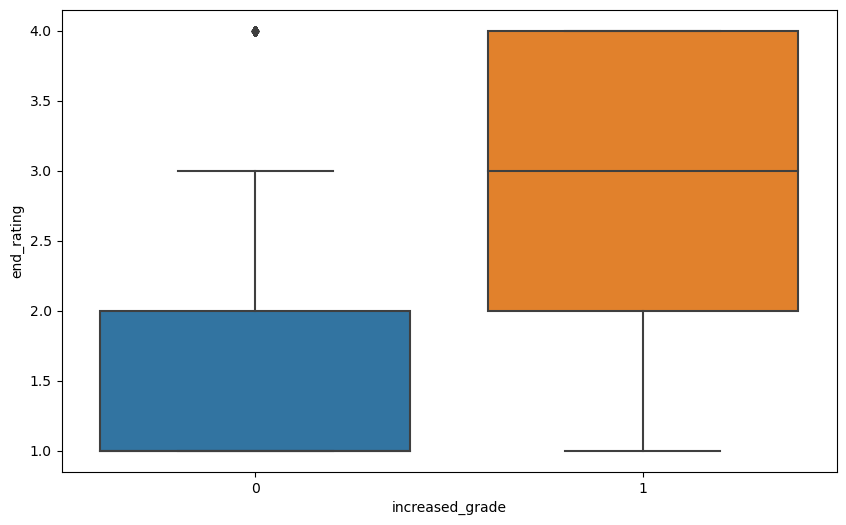

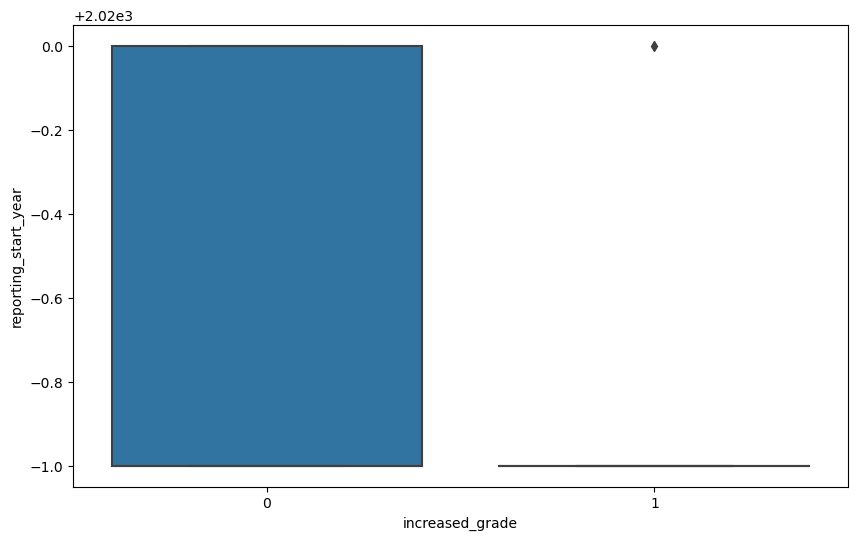

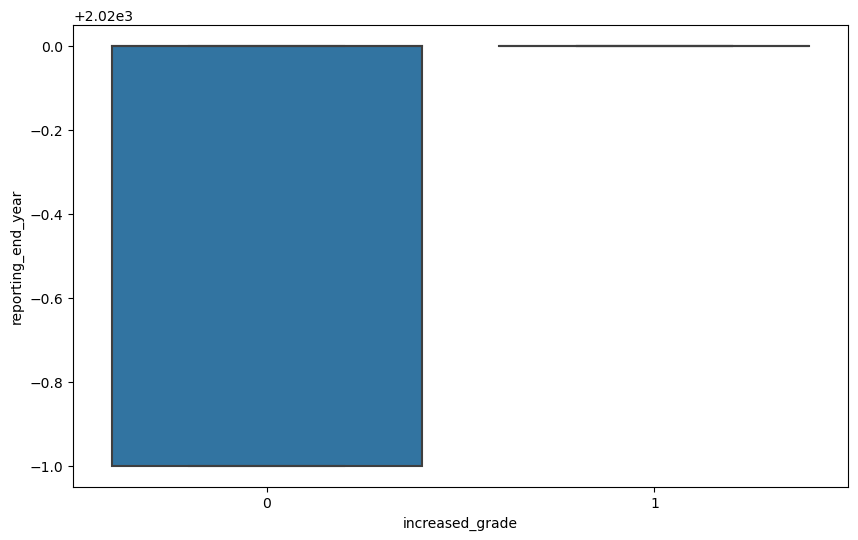

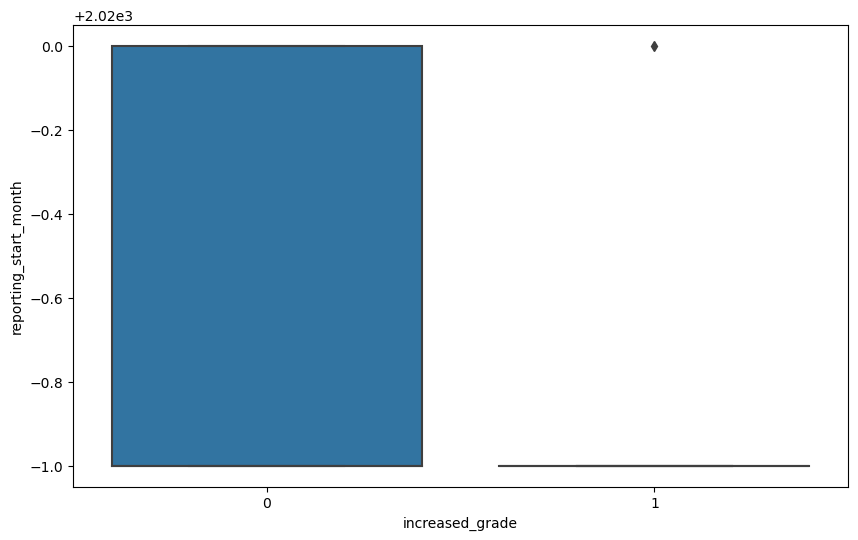

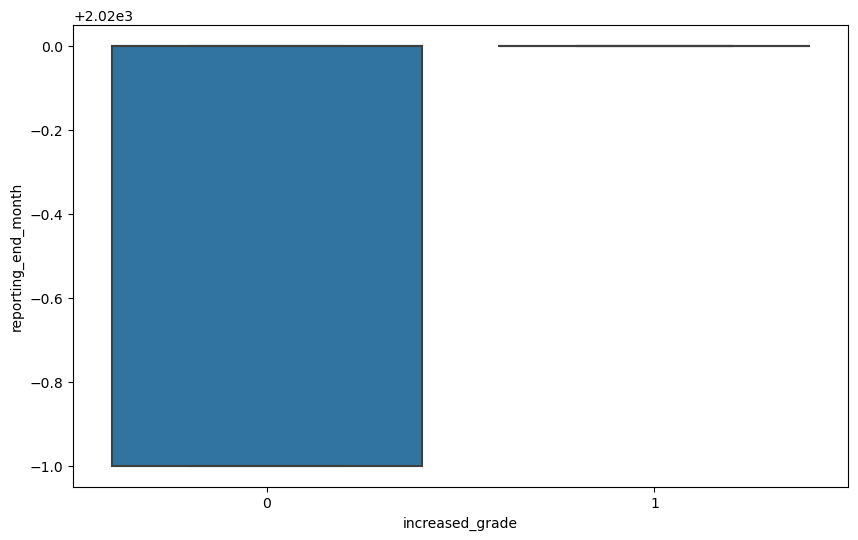

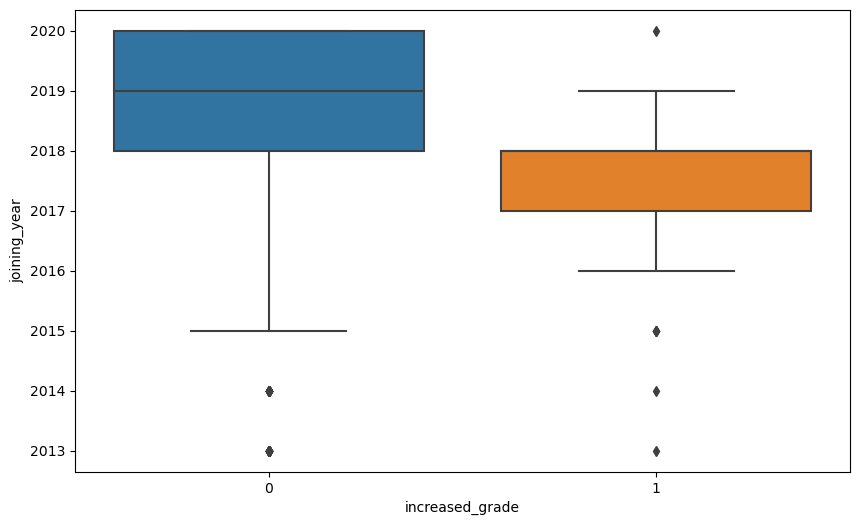

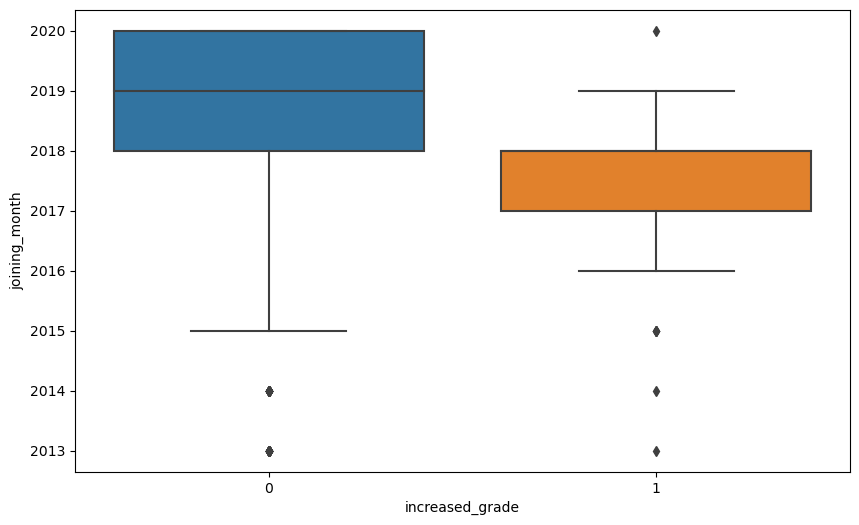

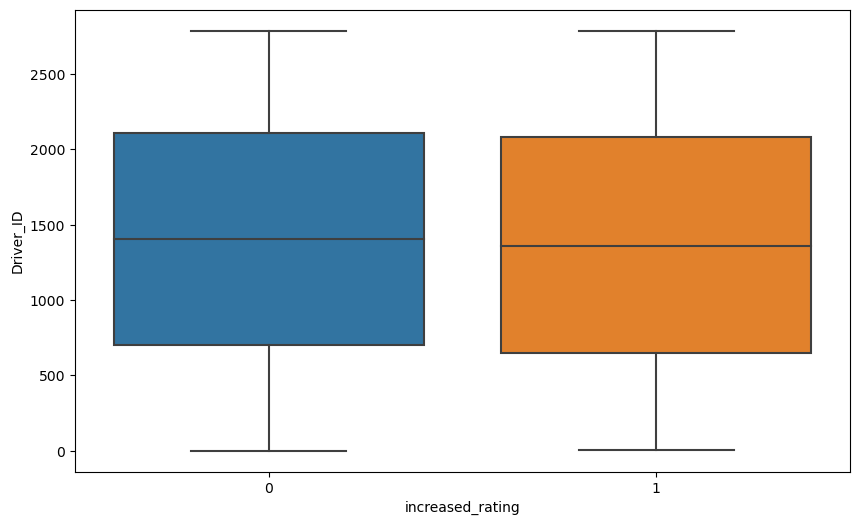

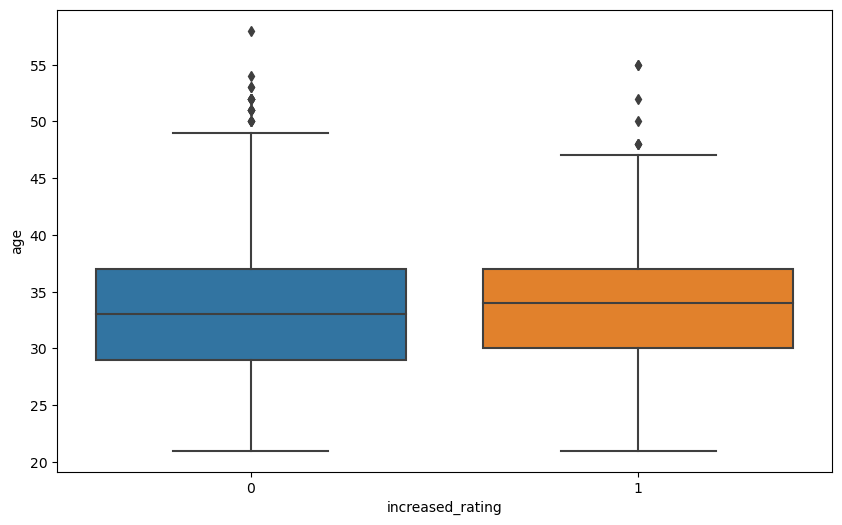

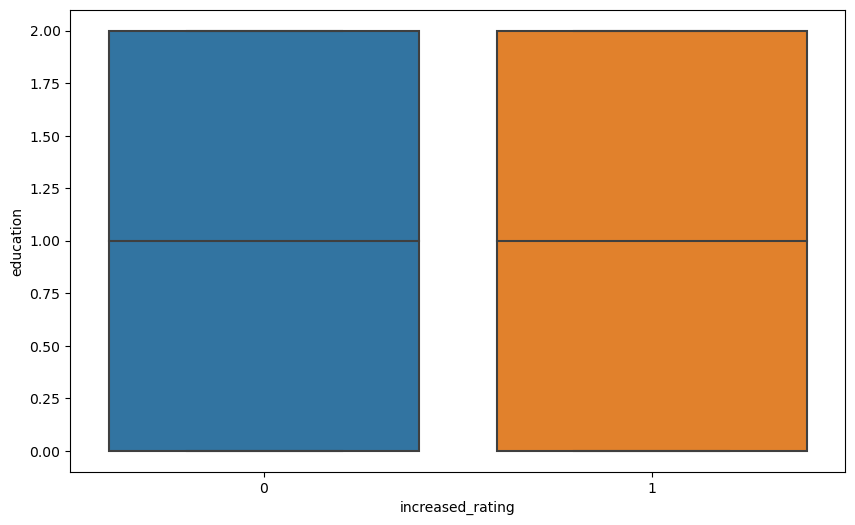

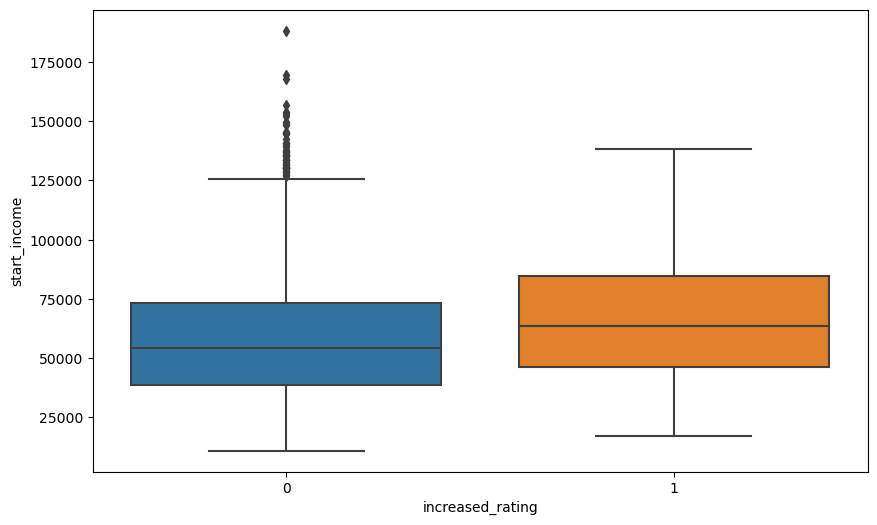

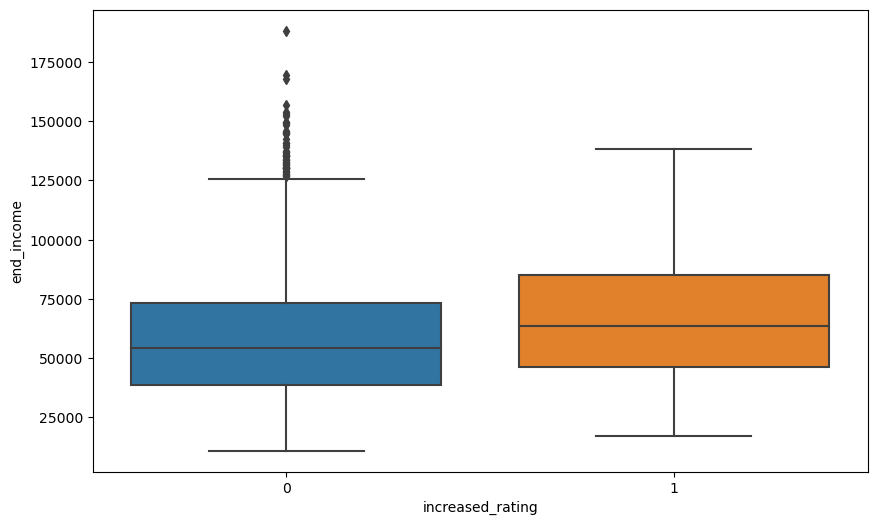

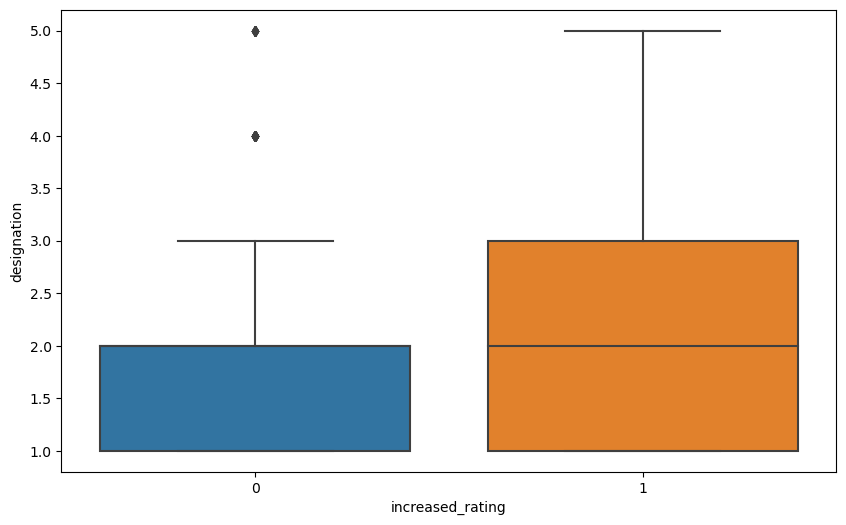

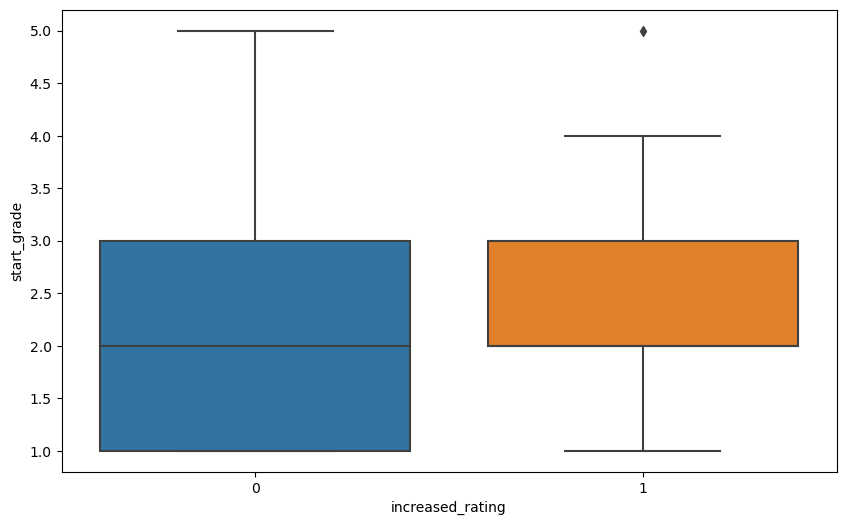

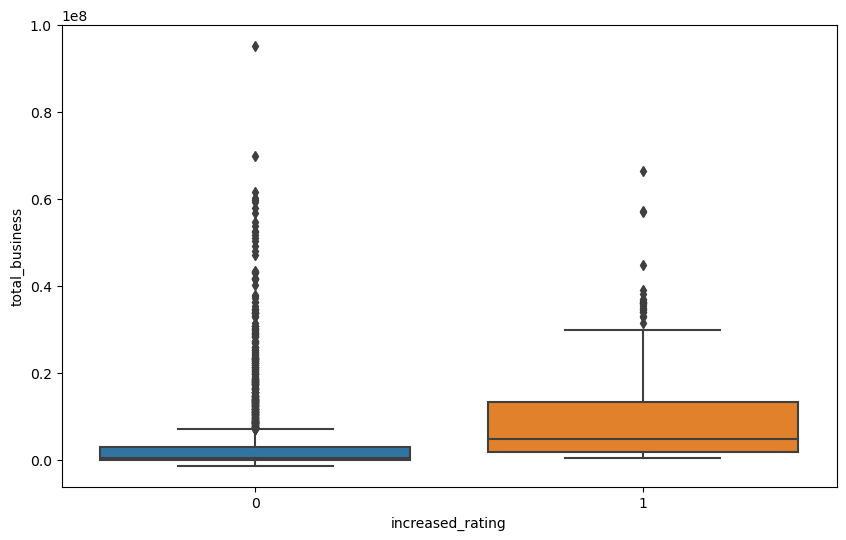

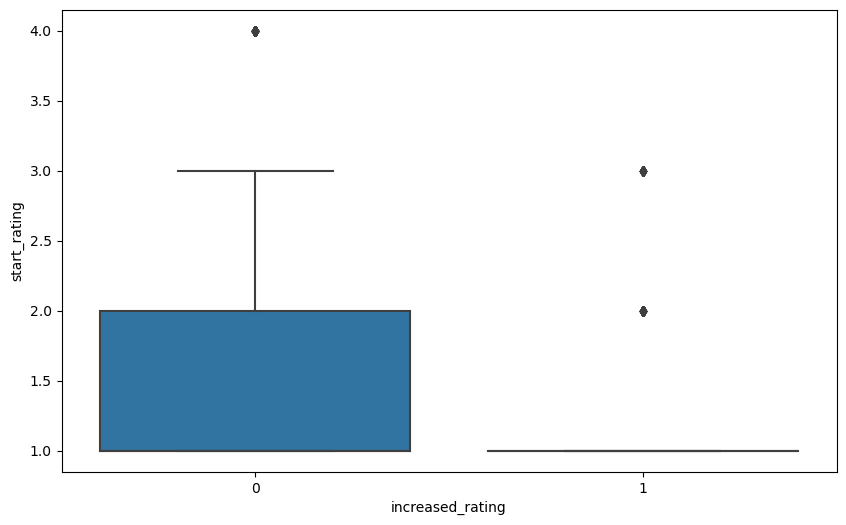

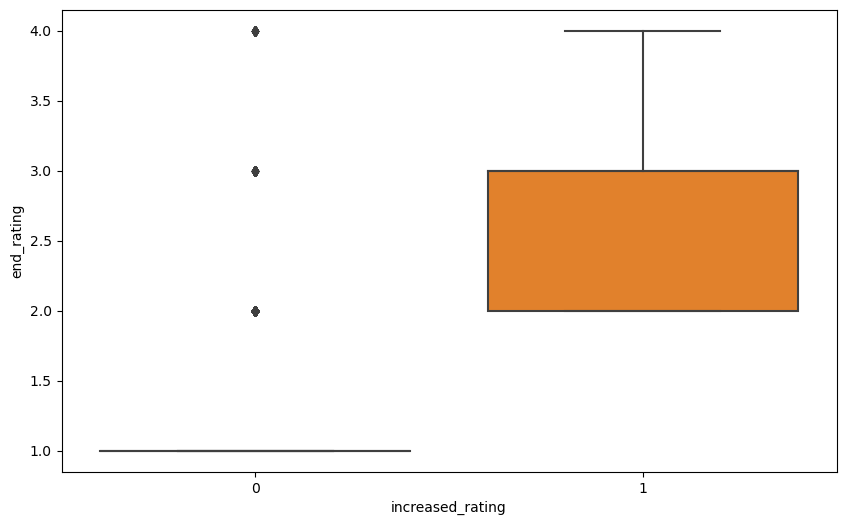

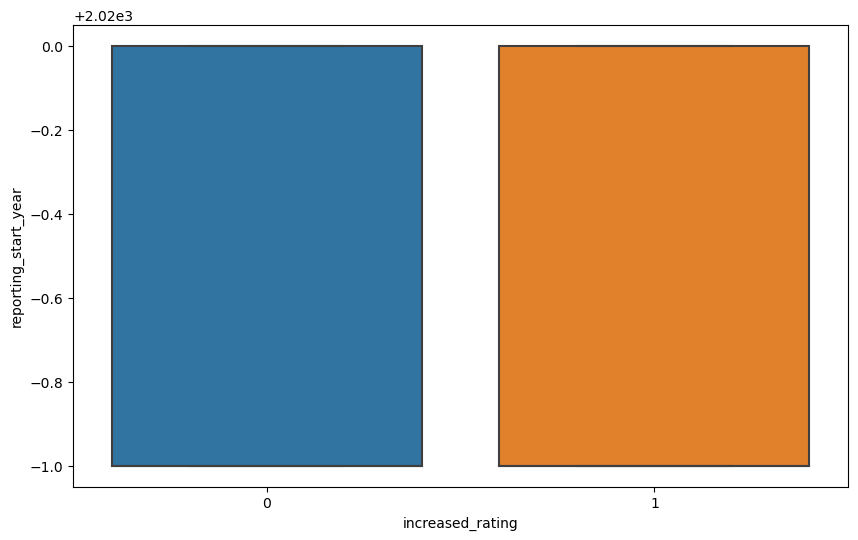

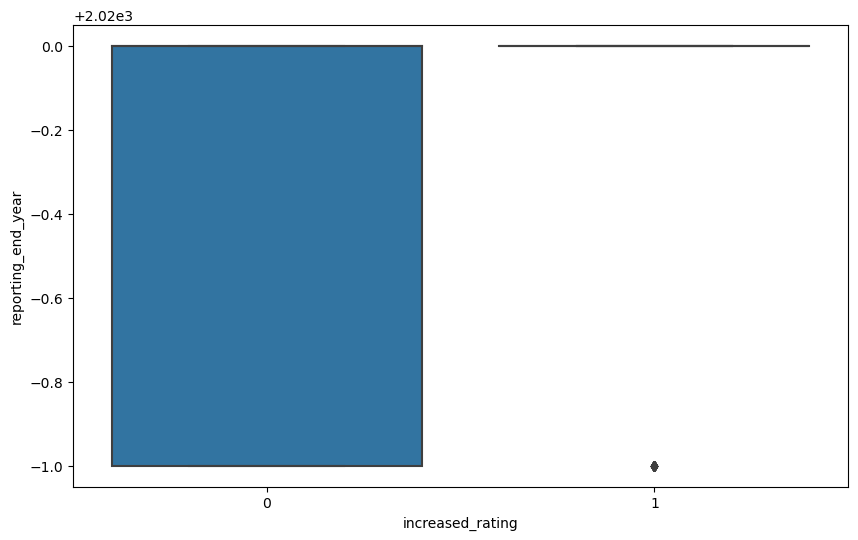

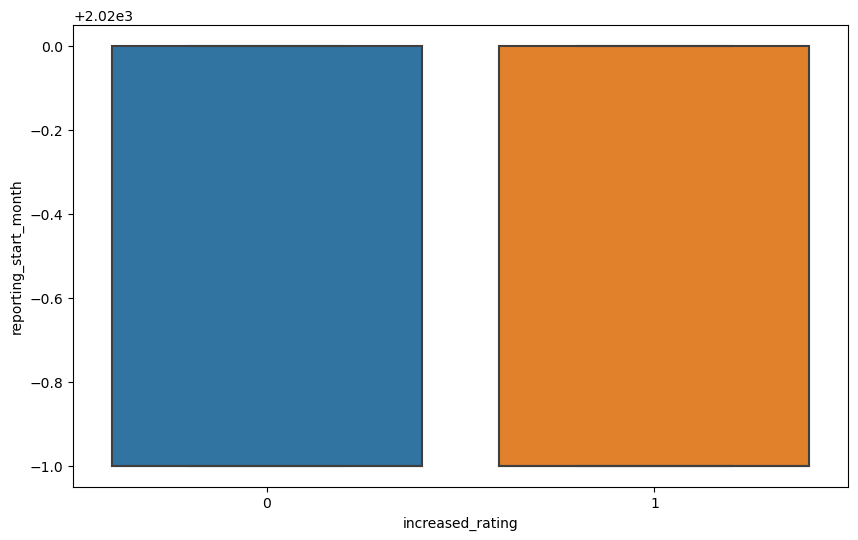

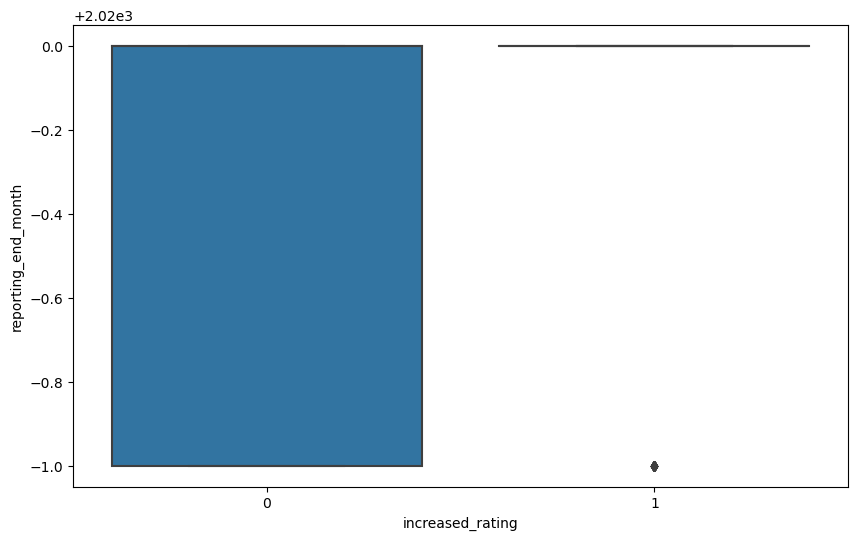

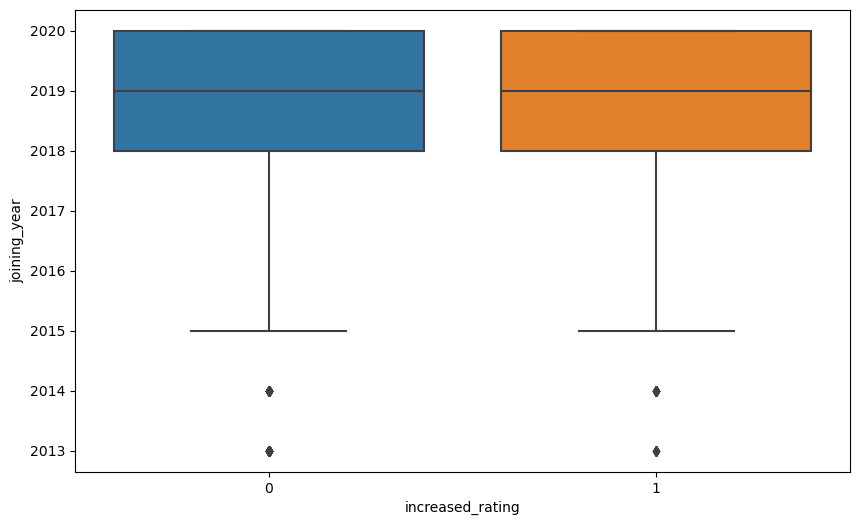

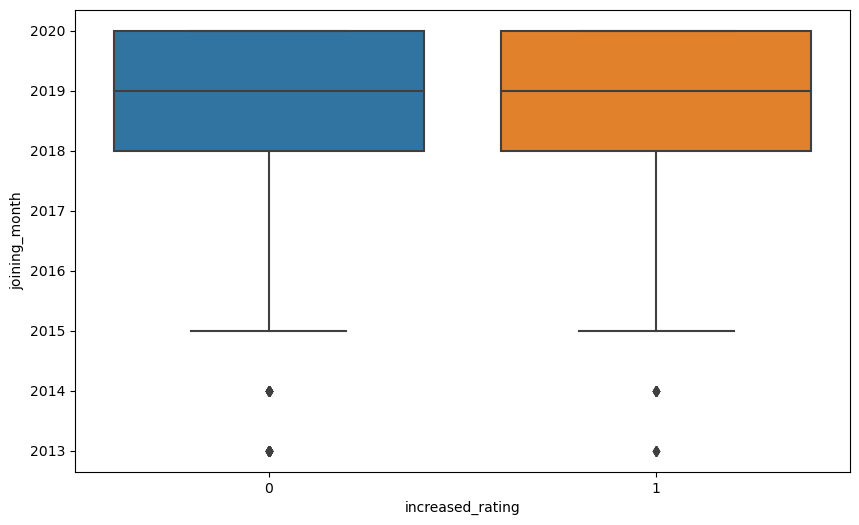

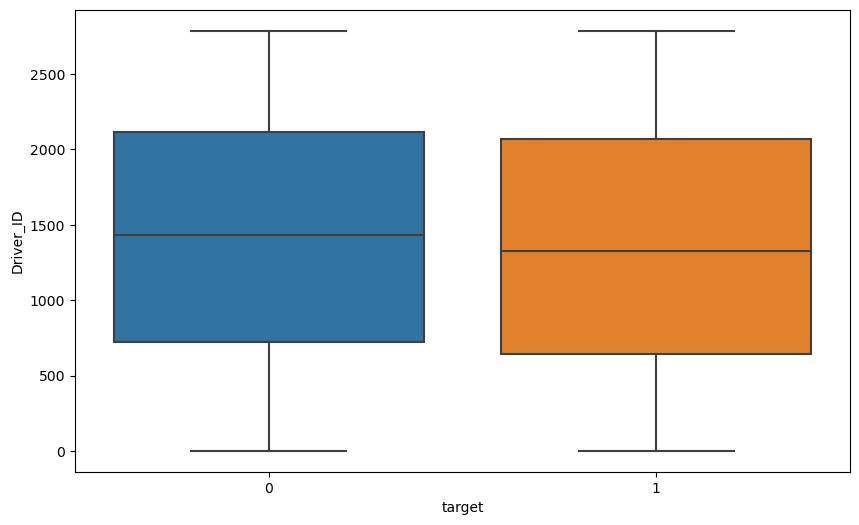

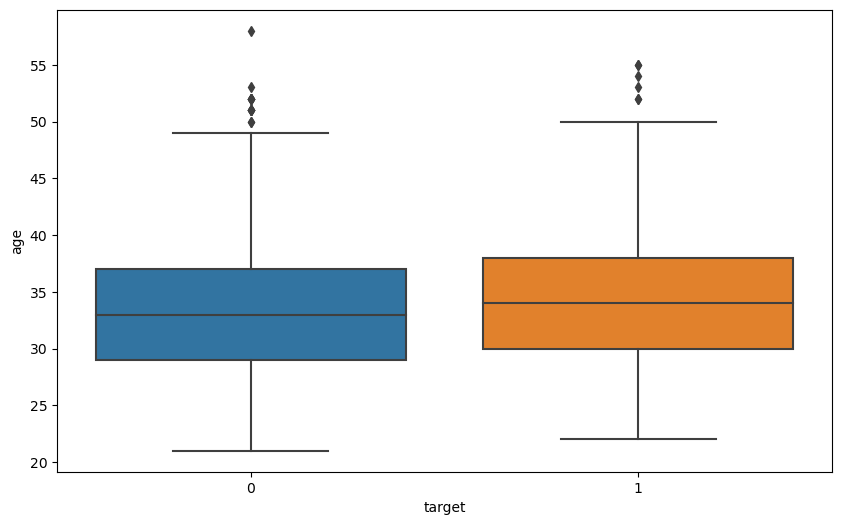

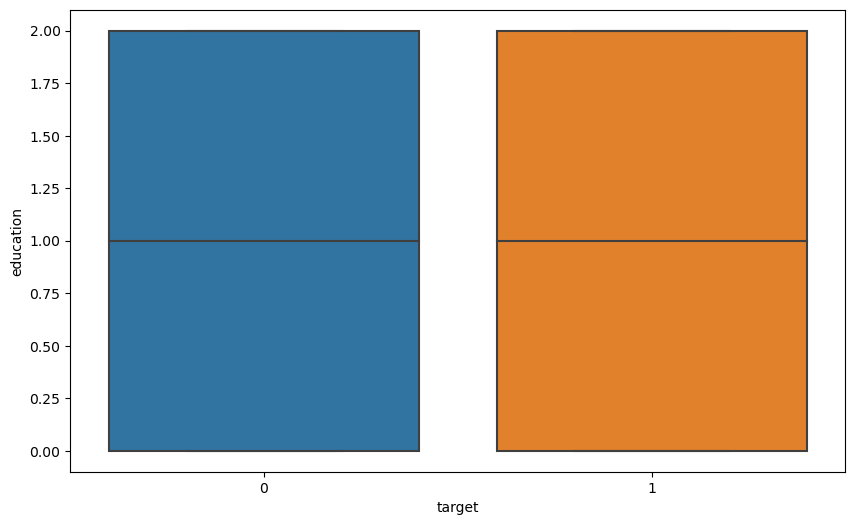

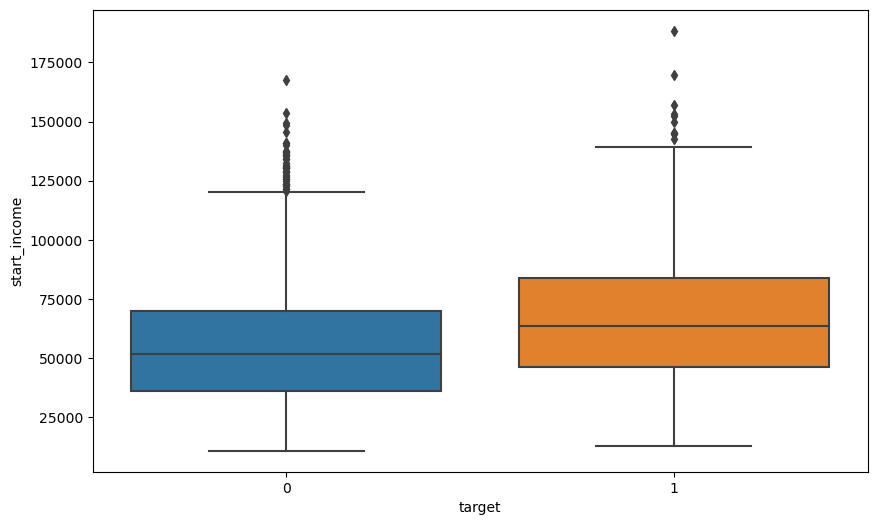

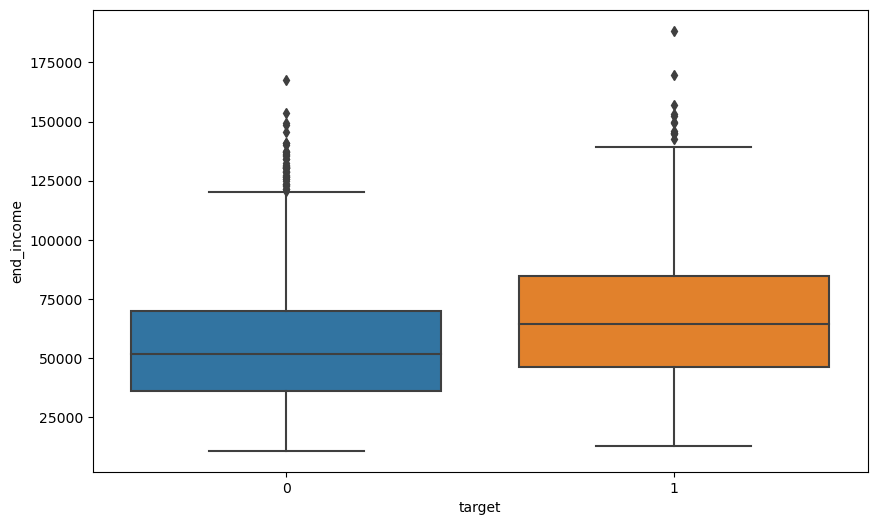

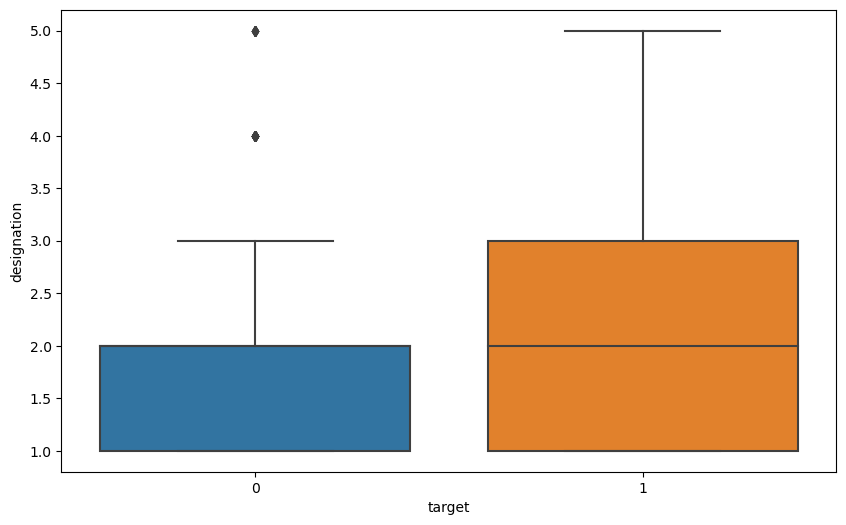

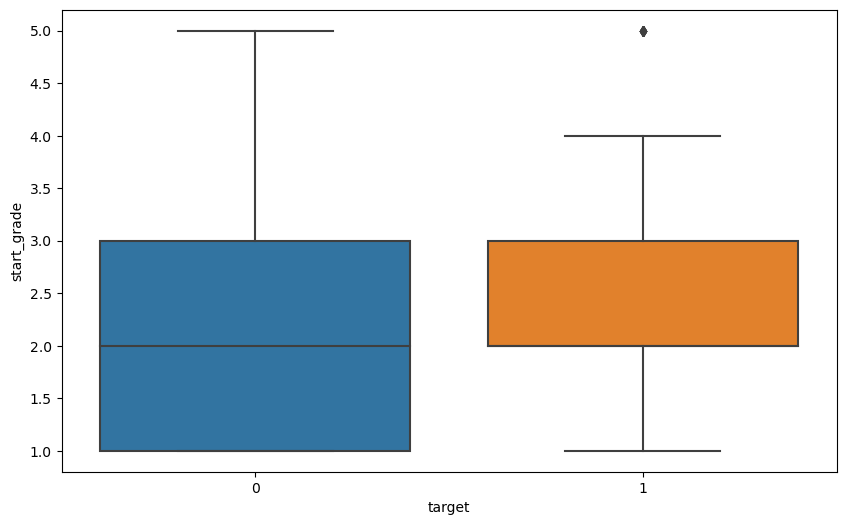

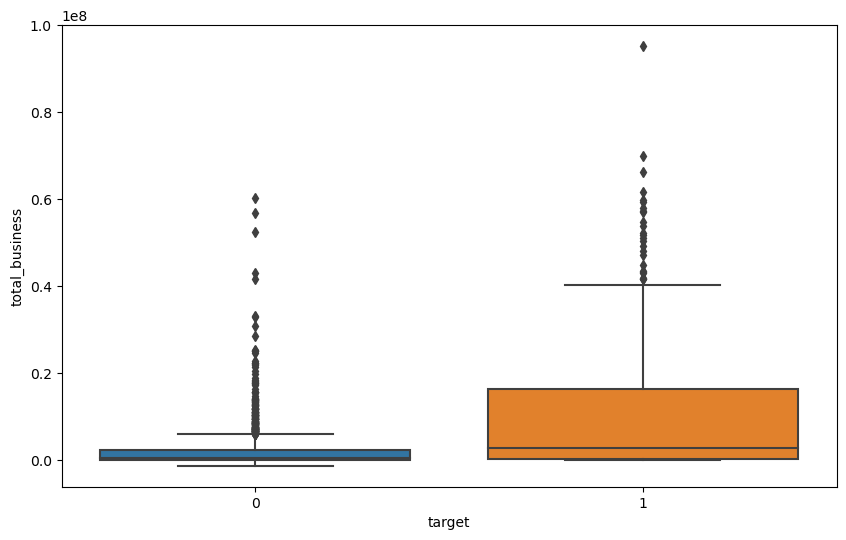

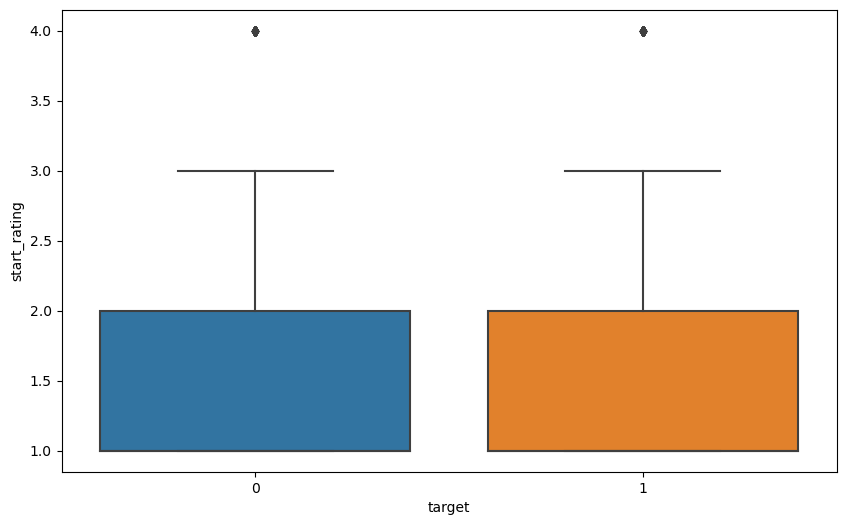

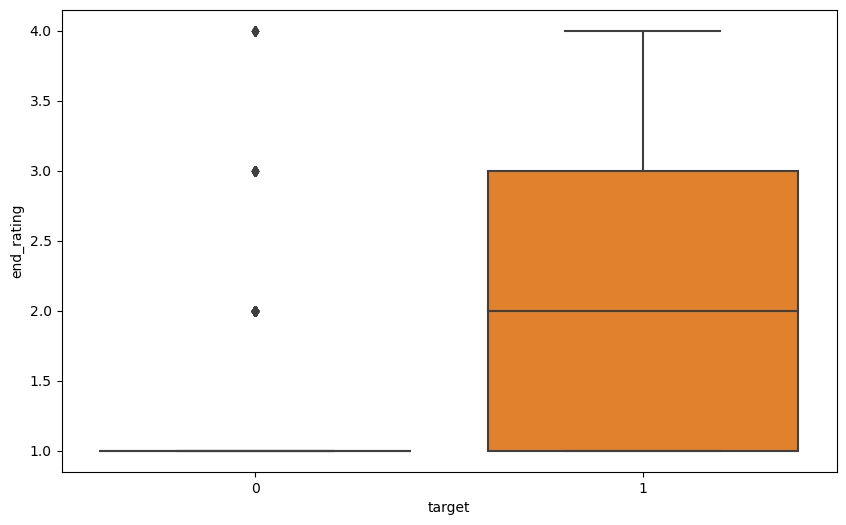

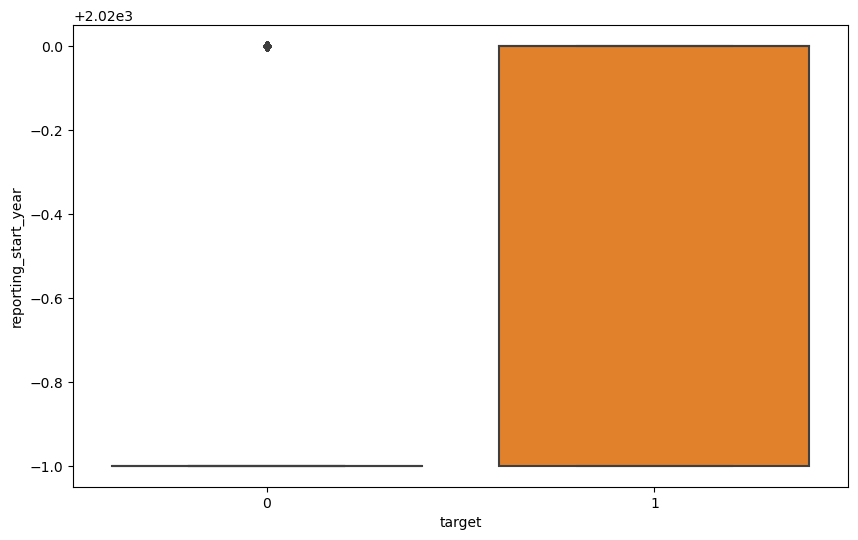

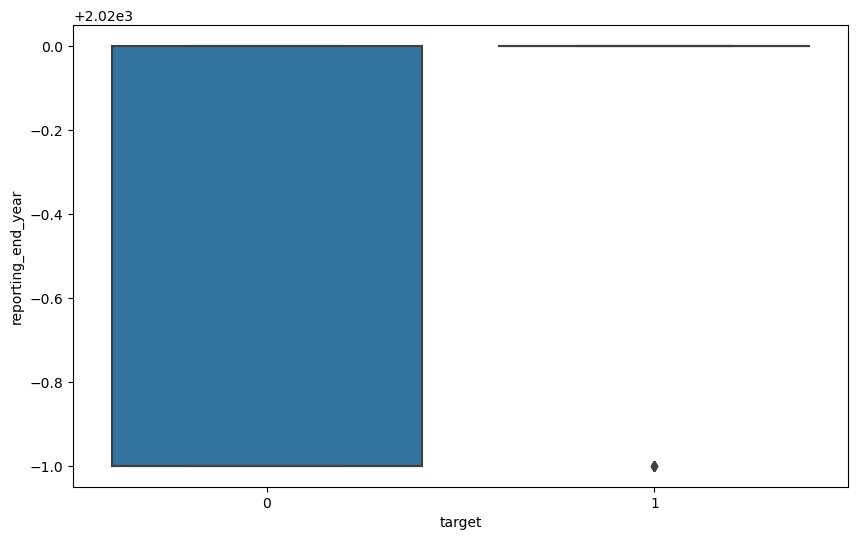

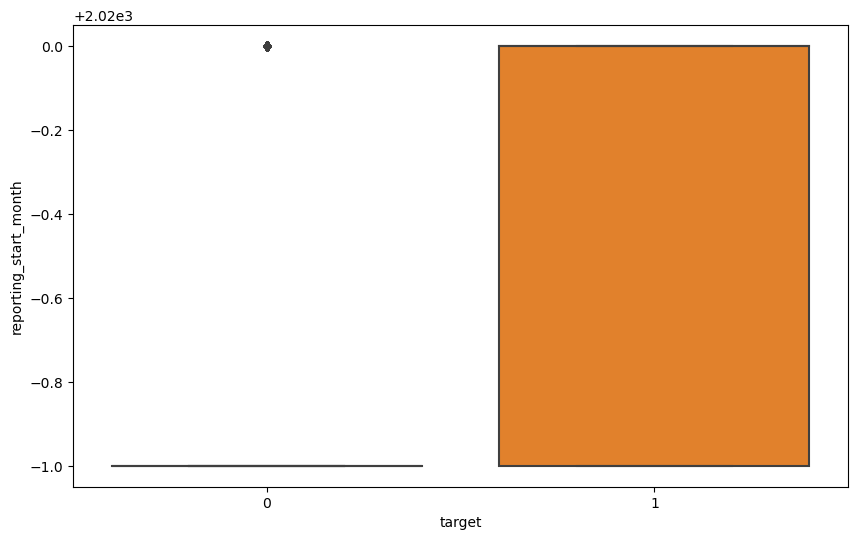

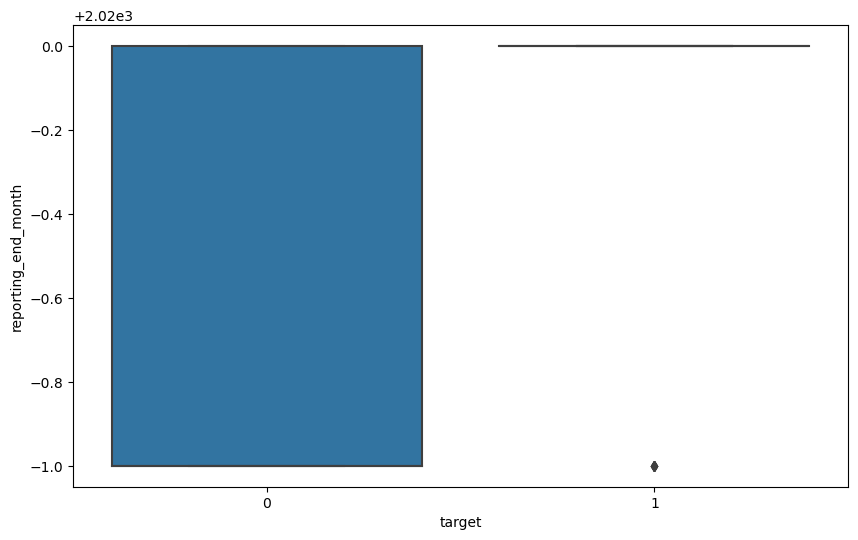

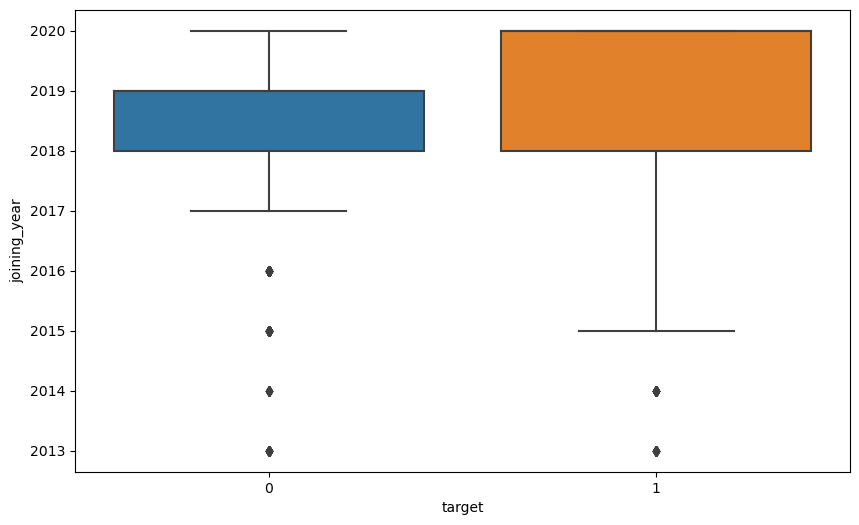

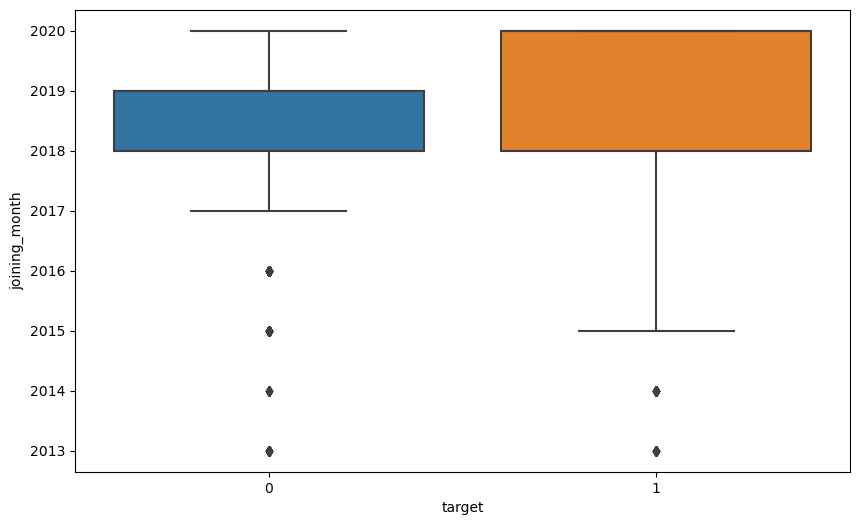

In [73]:
for i in cat_variables:
    for j in num_variables:
        fig,axis=plt.subplots(sharex=True,figsize=(10,6))
    
        sns.boxplot(x=df1[i],y=df1[j])

### Multivariate Analysis

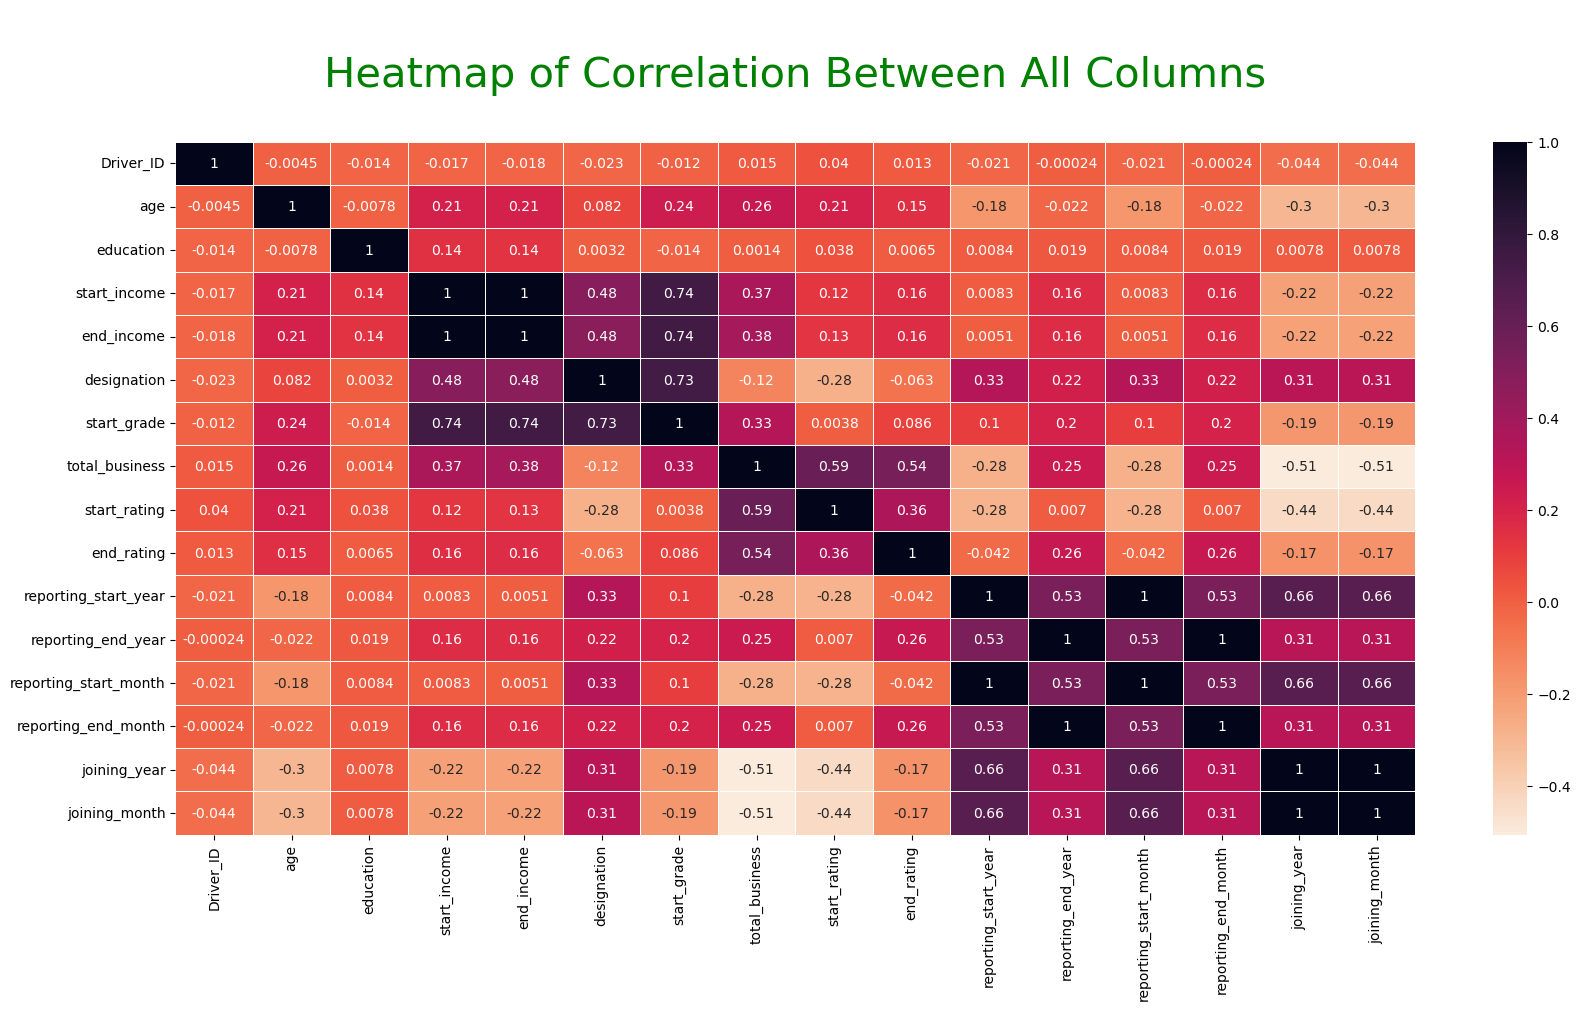

In [74]:
fig, ax = plt.subplots(figsize=(20,9))
sns.heatmap(df1.corr(), linewidths=.5, cmap=sns.cm.rocket_r, annot=True, ax=ax)
plt.title("\nHeatmap of Correlation Between All Columns\n", fontsize=30, color="green")
plt.show()

1.Start grade and end grade are highly correlated.Hence removing start grade

2.Start income and end income are highly correlated.Hence removing start income

In [75]:
df1.drop(['start_grade','start_income'],axis=1,inplace=True)


In [76]:
df1_original=df1.copy()
df1.drop(['reporting_start_date','reporting_end_date','joining_date','last_date'],axis=1,inplace=True)

In [77]:
df1.info()
df1.end_grade.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Driver_ID              2381 non-null   int64   
 1   age                    2381 non-null   int64   
 2   gender                 2381 non-null   category
 3   city                   2381 non-null   string  
 4   education              2381 non-null   int64   
 5   end_income             2381 non-null   int64   
 6   designation            2381 non-null   int64   
 7   end_grade              2381 non-null   category
 8   total_business         2381 non-null   int64   
 9   start_rating           2381 non-null   int64   
 10  end_rating             2381 non-null   int64   
 11  increased_income       2381 non-null   category
 12  increased_grade        2381 non-null   category
 13  increased_rating       2381 non-null   category
 14  reporting_start_year   2381 non-null   i

2    855
1    741
3    623
4    138
5     24
Name: end_grade, dtype: int64

### Processing Target Variable

In [78]:
df1.target.value_counts()

0    1616
1     765
Name: target, dtype: int64

In [79]:
df2=df1.copy()

In [80]:
df1['city']=df1['city'].astype('string')
#Converting category to int for encoding
for i,j in enumerate(df1.dtypes):
    if j=='category':
        print(df1.columns[i])
        df1[df1.columns[i]] = df1[df1.columns[i]].astype(int)
    if j=='string':
        df1[df1.columns[i]] = df1[df1.columns[i]].astype('category')


gender
end_grade
increased_income
increased_grade
increased_rating
target


In [81]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Driver_ID              2381 non-null   int64   
 1   age                    2381 non-null   int64   
 2   gender                 2381 non-null   int32   
 3   city                   2381 non-null   category
 4   education              2381 non-null   int64   
 5   end_income             2381 non-null   int64   
 6   designation            2381 non-null   int64   
 7   end_grade              2381 non-null   int32   
 8   total_business         2381 non-null   int64   
 9   start_rating           2381 non-null   int64   
 10  end_rating             2381 non-null   int64   
 11  increased_income       2381 non-null   int32   
 12  increased_grade        2381 non-null   int32   
 13  increased_rating       2381 non-null   int32   
 14  reporting_start_year   2381 non-null   i

As data is imbalanced,using smote to balance the data

### Train Test Split


In [82]:

X=df1[df1.columns]
X=X.drop('target',axis=1)
y=df1['target']
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE  
from category_encoders import *
target_encoder = TargetEncoder(return_df=True)
X = target_encoder.fit_transform(X,y)
# split into 70:30 ratio
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
print('After OverSampling, the shape of train_X: {}'.format(X_sm.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_sm.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_sm == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_sm == 0)))

X_train,X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 0)




After OverSampling, the shape of train_X: (3232, 20)
After OverSampling, the shape of train_y: (3232,) 

After OverSampling, counts of label '1': 1616
After OverSampling, counts of label '0': 1616


In [83]:
X.columns

Index(['Driver_ID', 'age', 'gender', 'city', 'education', 'end_income',
       'designation', 'end_grade', 'total_business', 'start_rating',
       'end_rating', 'increased_income', 'increased_grade', 'increased_rating',
       'reporting_start_year', 'reporting_end_year', 'reporting_start_month',
       'reporting_end_month', 'joining_year', 'joining_month'],
      dtype='object')

In [84]:
X_train.shape

(2585, 20)

In [85]:
y_train.shape

(2585,)

In [86]:
#Standard Scaler Encoding
X_train_columns=X_train.columns
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_train=pd.DataFrame(X_train_std, columns=X_train_columns)

In [87]:
X_train.head(5)

,Driver_ID,age,gender,city,education,end_income,designation,end_grade,total_business,start_rating,end_rating,increased_income,increased_grade,increased_rating,reporting_start_year,reporting_end_year,reporting_start_month,reporting_end_month,joining_year,joining_month
0,-1.177014,0.223245,1.345282,1.214623,1.351984,0.910650,0.278838,-0.111077,-0.115952,0.634389,0.558546,-0.136083,-0.136083,-0.437315,-0.796246,-1.660502,-0.796246,-1.660502,-0.300404,-0.300404
1,-1.653231,-0.648490,-0.743339,-1.580578,1.351984,-0.776663,0.278838,-0.111077,-0.447154,0.634389,0.558546,-0.136083,-0.136083,-0.437315,-0.796246,-1.660502,-0.796246,-1.660502,-0.300404,-0.300404
2,0.928839,-1.171531,-0.743339,0.324932,-1.160510,-0.186415,0.278838,-0.111077,-0.335532,0.634389,-0.636687,-0.136083,-0.136083,-0.437315,-0.796246,0.602227,-0.796246,0.602227,0.282587,0.282587
3,0.501268,0.571939,-0.743339,-0.464897,1.351984,0.422111,0.278838,-0.111077,0.239693,3.083822,2.949011,-0.136083,-0.136083,-0.437315,1.255893,0.602227,1.255893,0.602227,0.865579,0.865579
4,0.067295,0.048898,1.345282,0.609354,1.351984,-0.194409,0.278838,-0.111077,-0.490725,-0.590328,-0.636687,-0.136083,-0.136083,-0.437315,-0.796246,0.602227,-0.796246,0.602227,0.282587,0.282587


In [88]:
X_sm.shape, y_sm.shape

((3232, 20), (3232,))

In [89]:
X_train.columns

Index(['Driver_ID', 'age', 'gender', 'city', 'education', 'end_income',
       'designation', 'end_grade', 'total_business', 'start_rating',
       'end_rating', 'increased_income', 'increased_grade', 'increased_rating',
       'reporting_start_year', 'reporting_end_year', 'reporting_start_month',
       'reporting_end_month', 'joining_year', 'joining_month'],
      dtype='object')

### Testing on test data

In [90]:
X_test = target_encoder.transform(X_test)

In [91]:
X_test_columns=X_test.columns
X_test_std=std.transform(X_test)
X_test=pd.DataFrame(X_test_std, columns=X_test_columns)

In [92]:
X_test

,Driver_ID,age,gender,city,education,end_income,designation,end_grade,total_business,start_rating,end_rating,increased_income,increased_grade,increased_rating,reporting_start_year,reporting_end_year,reporting_start_month,reporting_end_month,joining_year,joining_month
0,0.427019,0.397592,1.345282,-0.087106,-1.160510,1.200139,0.278838,2.055969,0.374768,-0.590328,-0.636687,-0.136083,-0.136083,-0.437315,-0.796246,0.602227,-0.796246,0.602227,-3.215362,-3.215362
1,-0.108086,1.094980,-0.743339,-0.087106,-1.160510,0.154527,-0.947004,-0.111077,0.921204,0.634389,0.558546,-0.136083,-0.136083,-0.437315,-0.796246,0.602227,-0.796246,0.602227,-1.466387,-1.466387
2,-0.876178,-0.822837,1.345282,-0.087106,0.095737,-1.075132,-0.947004,-1.194600,-0.265671,1.859105,0.558546,-0.136083,-0.136083,-0.437315,-0.796246,-1.660502,-0.796246,-1.660502,-0.883396,-0.883396
3,0.151786,-0.125449,1.345282,-0.087106,0.095737,-1.140461,-0.947004,-1.194600,0.420727,0.634389,0.558546,-0.136083,-0.136083,-0.437315,-0.796246,0.602227,-0.796246,0.602227,-0.300404,-0.300404
4,-0.778886,-0.474143,-0.743339,-0.087106,-1.160510,-0.462944,0.278838,-0.111077,-0.558544,-0.590328,-0.636687,-0.136083,-0.136083,-0.437315,1.255893,0.602227,1.255893,0.602227,0.865579,0.865579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,0.484626,-2.043266,1.345282,-0.087106,-1.160510,-1.005049,-0.947004,-1.194600,-0.558544,-0.590328,-0.636687,-0.136083,-0.136083,-0.437315,-0.796246,0.602227,-0.796246,0.602227,0.282587,0.282587
643,0.546073,0.746286,-0.743339,-0.087106,0.095737,-0.637342,1.504680,0.972446,-0.500399,-0.590328,-0.636687,-0.136083,-0.136083,-0.437315,1.255893,0.602227,1.255893,0.602227,0.865579,0.865579
644,0.159467,0.223245,-0.743339,-0.087106,0.095737,0.621302,0.278838,-0.111077,0.378534,0.634389,-0.636687,-0.136083,-0.136083,-0.437315,-0.796246,0.602227,-0.796246,0.602227,0.282587,0.282587
645,-1.237181,-0.474143,-0.743339,-0.087106,0.095737,0.439192,-0.947004,-0.111077,-0.220539,0.634389,-0.636687,-0.136083,-0.136083,-0.437315,-0.796246,-1.660502,-0.796246,-1.660502,-2.049379,-2.049379


### Bagging-Random Forest

In [93]:
params = {
          'n_estimators' : [5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500],
          'max_depth' : [1, 2, 3, 4, 5,10, 15, 20, 30],
          'criterion' : ['gini', 'entropy'],
          'bootstrap' : [True, False],
          'max_features' : [2, 4, 6, 8, 10, 15, 20]
         }

In [94]:
grid = GridSearchCV(estimator = RandomForestClassifier(), 
                               param_grid = params,
                               scoring = 'accuracy',
                               cv = 5,
                               n_jobs=-1
                               )

In [95]:
X_train.shape
y_train.shape

(2585,)

In [ ]:
grid.fit(X_train, y_train)
parameters = grid.best_params_
score = grid.best_score_
print(parameters)
print(score)  

### Using best params on Random Forest

In [ ]:
tree_clf = RandomForestClassifier(random_state=7, bootstrap=False, criterion='gini', max_depth=1, max_features=10, n_estimators=30)
kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(tree_clf, X_train, y_train, cv = kfold, scoring = 'accuracy', return_train_score = True)

print(f"K-Fold Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
print(f"K-Fold Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")

In [ ]:
tree_clf.fit(X_train,y_train)

In [ ]:
tree_clf.score(X_test,y_test)

In [ ]:
print(classification_report(y_test, tree_clf.predict(X_test), target_names=['Still Working', 'Left']))

In [ ]:
y_score = tree_clf.predict_proba(X_test)[:, 1]

### Feature Importance

In [ ]:
importances = tree_clf.feature_importances_
feature_names = X_train.columns
forest_importances = pd.Series(importances, index=feature_names)
forest_importances.sort_values(ascending=False)

### Precision-Recall Curve

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

In [ ]:
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

In [ ]:
print(f"Area under precision Recall curve:{auc(recall, precision)}")

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='purple')
ax.set_title('ROC-AUC Curve')
ax.set_ylabel('TPR')
ax.set_xlabel('FPR')
plt.show()

In [ ]:
print(f"Area under ROC-AUC curve is {auc(fpr, tpr)}")

In [ ]:
threshold_list = [0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
scores = []
for threshold in threshold_list:
    y_pred = np.vectorize(lambda x: 1 if x>threshold else 0)(y_score)
    scores += [f1_score(y_test, y_pred)]
fig, ax = plt.subplots()
ax.plot(threshold_list, scores, color='purple')
ax.set_title('F1-Score-Threshold Curve')
ax.set_ylabel('F1-Score')
ax.set_xlabel('Threshold')
plt.show()

### Boosting Algorithms

In [ ]:
params = {
          'n_estimators' : [5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500],
          'max_depth' : [1, 2, 3, 4, 5,10, 15, 20, 40],
          'learning_rate' : [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 1]
         }

In [ ]:
grid = GridSearchCV(estimator = GradientBoostingClassifier(), 
                               param_grid = params,
                               scoring = 'accuracy',
                               cv = 5,
                               n_jobs=-1
                               )

In [ ]:
grid.fit(X_train, y_train)

parameters = grid.best_params_
score = grid.best_score_
print(parameters)
print(score)  

In [ ]:
gbdt = GradientBoostingClassifier(n_estimators=300, learning_rate=0.01, max_depth=4, random_state=0)
kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(gbdt_clf, X_train, y_train, cv = kfold, scoring = 'accuracy', return_train_score = True)

print(f"K-Fold Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
print(f"K-Fold Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")

In [ ]:
gbdt.fit(X_train,y_train)

In [ ]:
gbdt.score(X_test,y_test)

In [ ]:
print(classification_report(y_test, gbdt.predict(X_test), target_names=['Still Working', 'Left']))

### Feature Importance

In [ ]:
importance = gbdt.feature_importances_
feature_names = X_train.columns
imp = pd.Series(importance, index=feature_names)
imp.sort_values(ascending=False)

### ROC_AUC Curve

In [ ]:
y_score = tree_clf.predict_proba(X_test)[:, 1]

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

In [ ]:
print(f"Area under precision Recall curve:{auc(recall, precision)}")

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='purple')
ax.set_title('ROC-AUC Curve')
ax.set_ylabel('TPR')
ax.set_xlabel('FPR')
plt.show()

In [ ]:
print(f"Area under ROC-AUC curve is {auc(fpr, tpr)}")

In [ ]:
threshold_list = [0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
scores = []
for threshold in threshold_list:
    y_pred = np.vectorize(lambda x: 1 if x>threshold else 0)(y_score)
    scores += [f1_score(y_test, y_pred)]
fig, ax = plt.subplots()
ax.plot(threshold_list, scores, color='purple')
ax.set_title('F1-Score-Threshold Curve')
ax.set_ylabel('F1-Score')
ax.set_xlabel('Threshold')
plt.show()

### Insights
1.More male drivers are there than females

2.Number of new drivers stepping in has increased from 2018

3.Average age of drivers is 32-34

4.Most of the drivers are graduates

5.Average increase salary is between 55000-65000

6.Factors which could lead to leaving OLA for drivers depend significantly on reporting start month,reporting start year,end rating

7.Highest end rating obtained by drivers who left organisation is 2

8.Highest people joined and left ola in 2020 with highest leaving in December

9.Highest Experience people employed with OLA and being in OLA have low education,high ratings and have generated high revenue for OLA

10.Test model accuracy achieved for 'Bagging' and 'Boosting' is 99% and 99% respectively.

11.Area under ROC-AUC curve for 'Bagging' and 'Boosting' is 99% and 99% respectively.

12. F1-Score is betwwen 95% for both 'Bagging' and 'Boosting' models and for both target labels.

13. Precision and Recall Scores are between 94% to 96% for both 'Bagging' and 'Boosting' models and for both target labels.



### Recommendation:

1.Focus should be more on recruiting more females as separate marketing startegy can be planned targeting women customers

2.From the data,it is evident that more people joined/left in 2020 with highest people left in December.

3.From the above point it could be inferred that these graduates have joined during corona due to their work impacted by lockdown.
Once the lockdown has been lifted,they went back to pursue other oppurtunities even after giving best performance.

4.Though they have left post lifting lockdown,specific focus should be given on boosting the retaining of the drivers by incentives,bonus and finding  the driver issue by getting frequent feedbacks

5.Average rating was 2-3.However highest was 2.This could leave to decrease in revenue of drivers which could have made them to leave.
Management should be enquiring this if a driver frequently gets low rating and should be helping in quick resolution of their issue which could build the trust of drivers
